# 5: 건강검진 데이터로 가설검정

김보람  
2022-11-24

# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 로드

In [1]:
import pandas as pd #분석 사용
import numpy as np #수치 계산
import seaborn as sns #시각화 사용
import matplotlib.pyplot as plt # 그래프 시각화

#%matplotlib inline # 구버전의 주피터 노트북에서 설정이 되어야 노트북 안에서 그래프가 시각화 된다

# 한글폰트 설정

In [2]:
# Google colaboratory을 사용할 경우는 ctrl(cmd) + /로 주석을 없애서 실행을 합니다.



# Jupyter notebook을 사용할 떄는 다음과 같이 코드를 작성합니다.

# 마이너스 폰트가 깨지는 문제를 대처하기 위해 아래 코드를 작성합니다.



In [3]:
import os
# 윈도우, 맥 외의 os는 별도로 설정

if os.name == 'posix' :
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
    # 마이너스 폰트 깨지는 문제 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정시 글씨가 좀 더 선명하게 보인다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지한다.
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

-   국민건강보험 데이터를 사용하겠습니다. 공공데이터포털에서
    건강검진정보를 다운로드 받습니다. 우리가 엑셀도 좋지만 파이썬으로
    데이터 분석을 배우는 이유는 대용량 데이터를 분석하기 위함입니다.
    2018년 데이터는 utf-8로 되어 있고, 2017년 데이터는 한글 인코딩이
    되어 있습니다. 2017년 데이터를 사용합니다.

In [5]:
df=pd.read_csv("data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df

In [6]:
df.shape

## 데이터 미리보기

In [7]:
# sample, head, tail 통해 데이터 미리보기
df.head()

In [8]:
df.tail()

In [9]:
df.sample()

# 기본정보 보기

In [10]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [11]:
# 컬럼의 수가 많다. 컬럼만 따로 출력
df.columns

In [12]:
# dtypes를 통해 데이터 형식만 출력
df.dtypes

# 결측치 보기

In [13]:
True == 1

In [14]:
True + True + False

In [15]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어준다.
df.isnull().sum()

In [16]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계한다.
df.isna().sum()

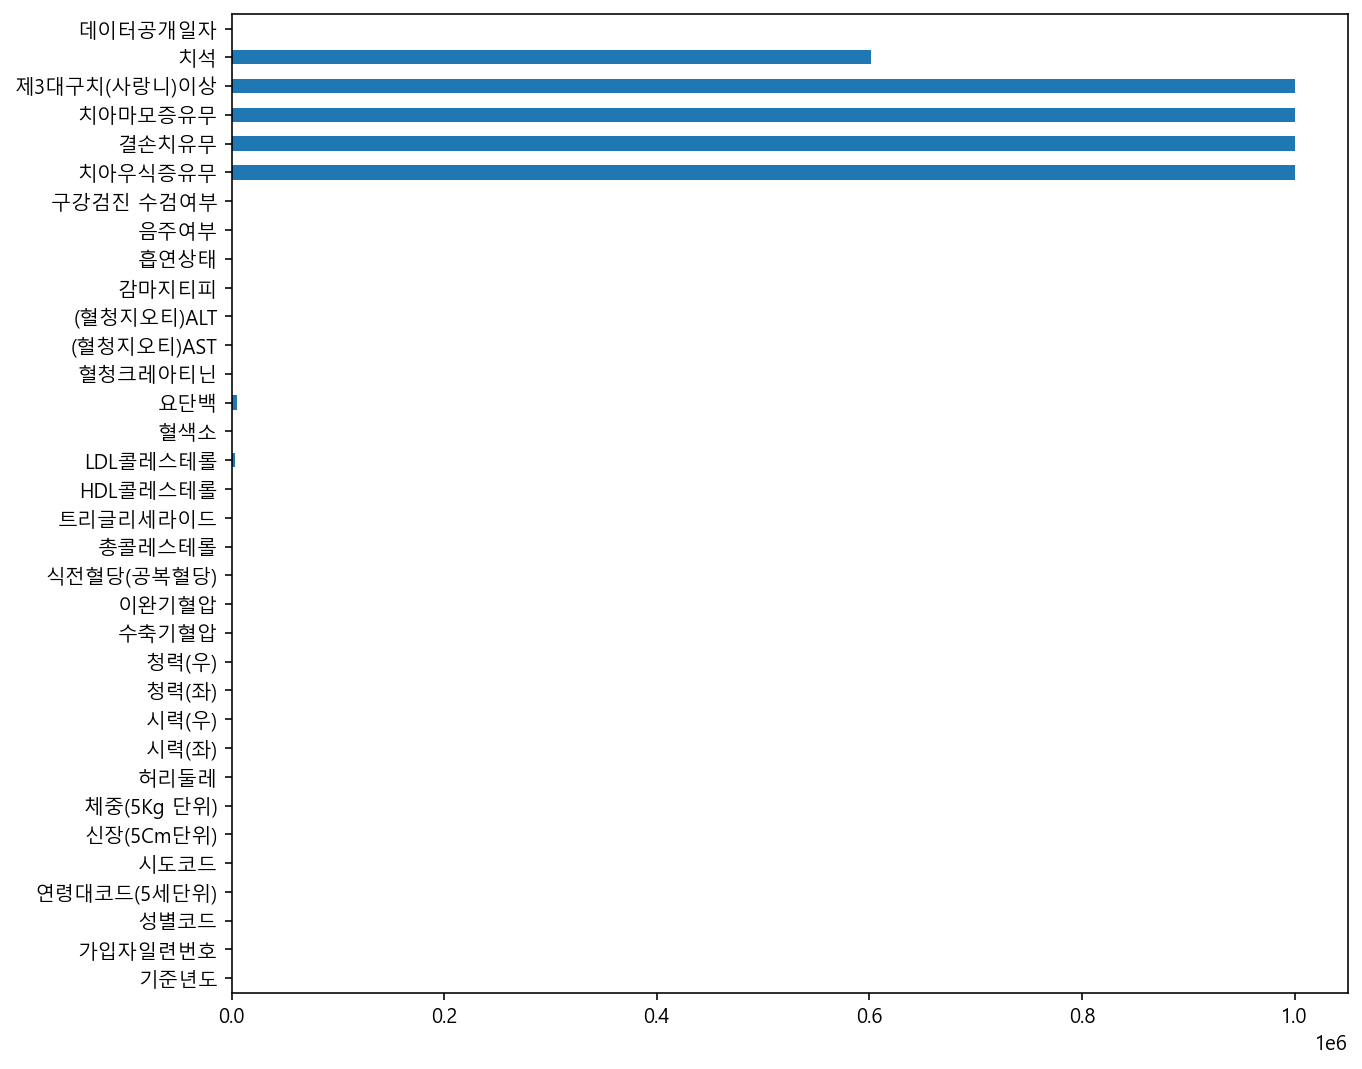

In [17]:
# 판다스에 내장된 plot를 통해 시각화를 한다.
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [18]:
# 여러 컬럼을 가져온다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 한다.
df["(혈청지오티)ALT", "(혈청지오티)AST"]

# 오류가 난다!! 두개 이상의 데이터를 불러 올 때는 리스트 자료 구조로 가져와야 한다.

In [19]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

In [20]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB

In [21]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

# value_counts로 값 집계하기

In [22]:
# 성별코드로 그룹화 하고 갯수 집계하기
df["성별코드"].value_counts()

In [23]:
# 흡연상태로 그룹화 하고 갯수 집계하기
df["흡연상태"].value_counts()
# 1:노흡연 3:흡연자 2:흡연했따가 금연

# groupby와 pivot_table 사용

## groupby

In [24]:
# 성별코드로 그룹화 한 데이터 세어보기
df.groupby?

In [25]:
df.groupby(["성별코드"])["가입자일련번호"].count()

In [26]:
# 성별코드와 음주여부로 그룹화 하고 갯수 세기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

In [27]:
# 성별코드와 음주여부로 그룹화 하고 감마지티피의 평균 구하기

df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

In [28]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구한다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

In [29]:
# agg를 사용하면 여러 수치를 함께 구할 수 있다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count","mean","median"])

## pivot_table

In [30]:

# 음주여부에 따른 그룹화된 수 피봇테이블 구하기
df.pivot_table(index="음주여부")

In [31]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")
# mean값이 기본 세팅값이므로 aggfunc로 바꿔주기. 

In [32]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")
# data frame으로 출력된다! 

In [33]:
# 음주여부에 따른 감마지티피의 평균 구하기

pd.pivot_table(df, index="음주여부", values="감마지티피")

In [34]:
# 기본값은 평균을 구하지만 aggfunc를 통해 지정이 가능하다.

pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

In [35]:
# aggfunc에 describe를 사용해 통계요약값을 볼수있다.

pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

# 전체 데이터 시각화 하기

-   100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기
    때문에 groupby 또는 pivot_table로 연산을 하여 시각화하거나 필요한
    데이터만 추출해서 시각화해보시길 권장합니다.

-   메모리 용량을 줄이기 위해서 대부분의 수치 데이터로 이루어져
    있습니다.

## 히스토그램

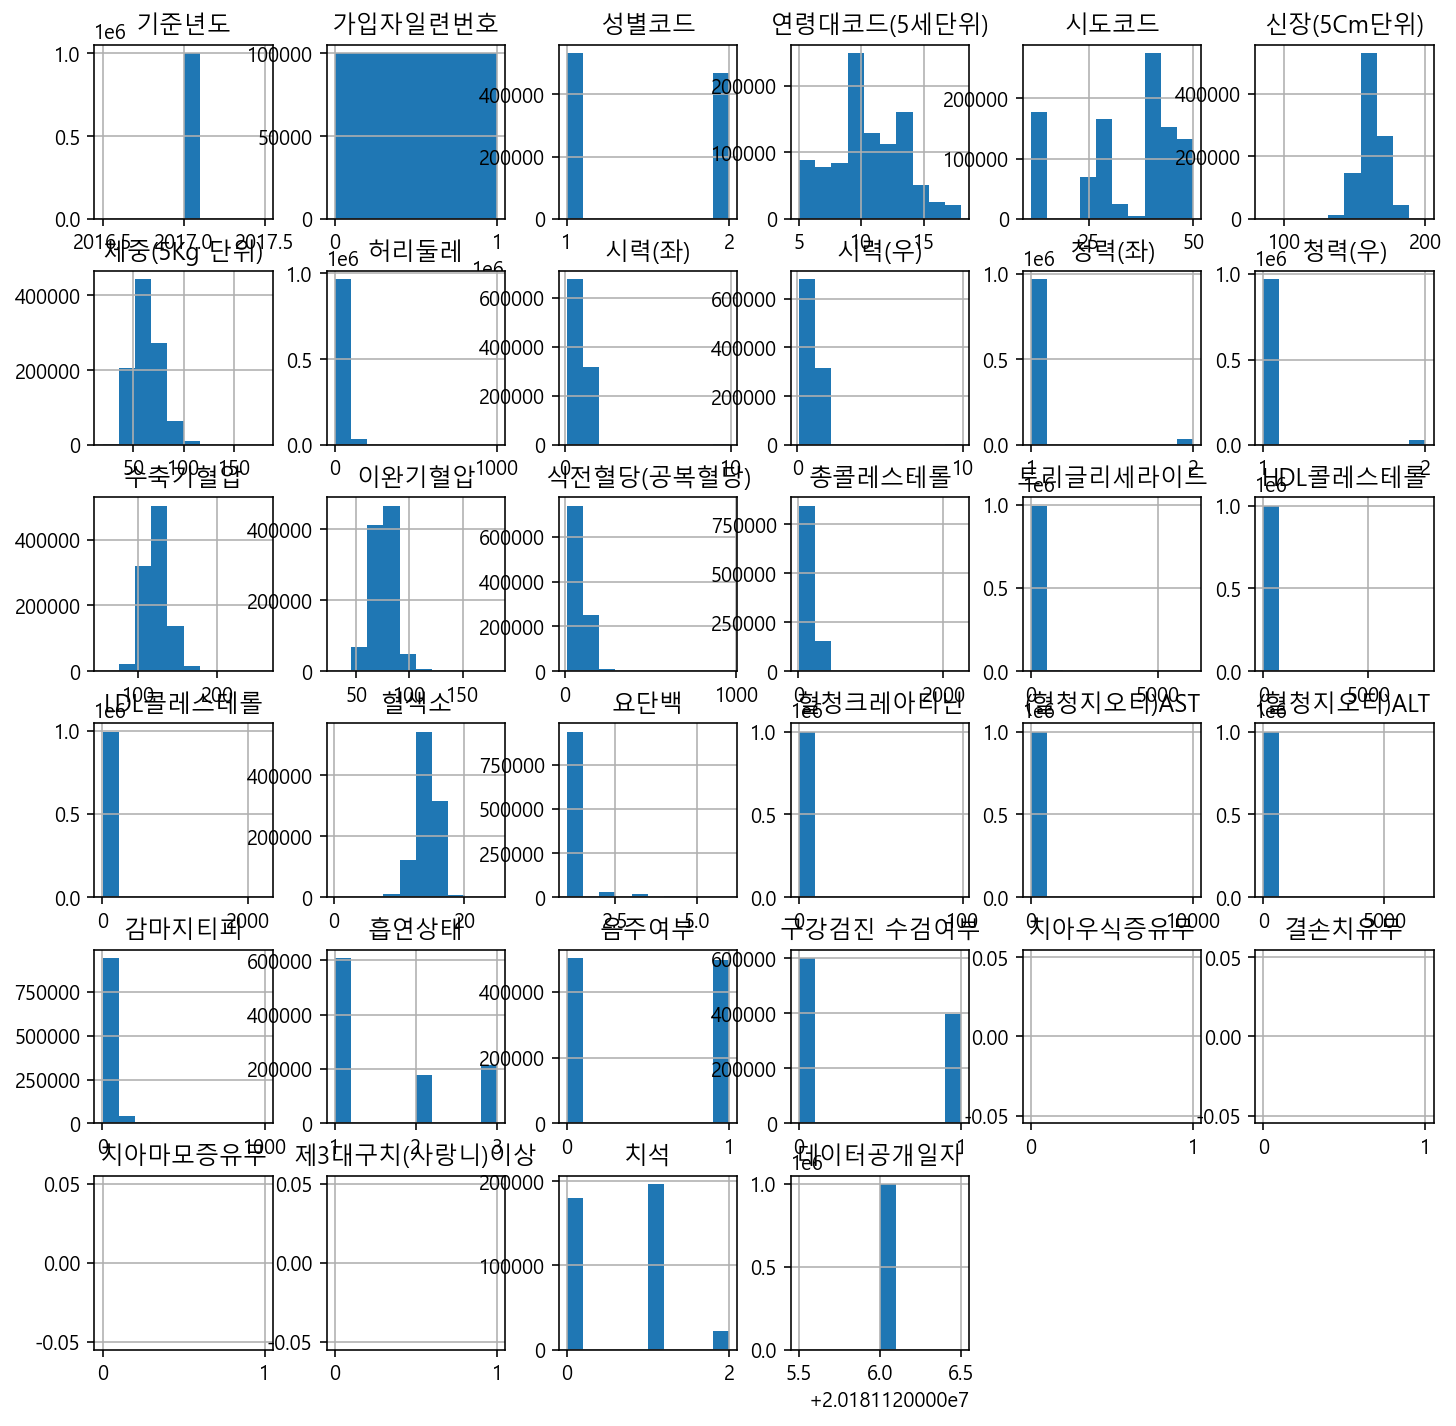

In [36]:
df.hist(figsize=(12,12))

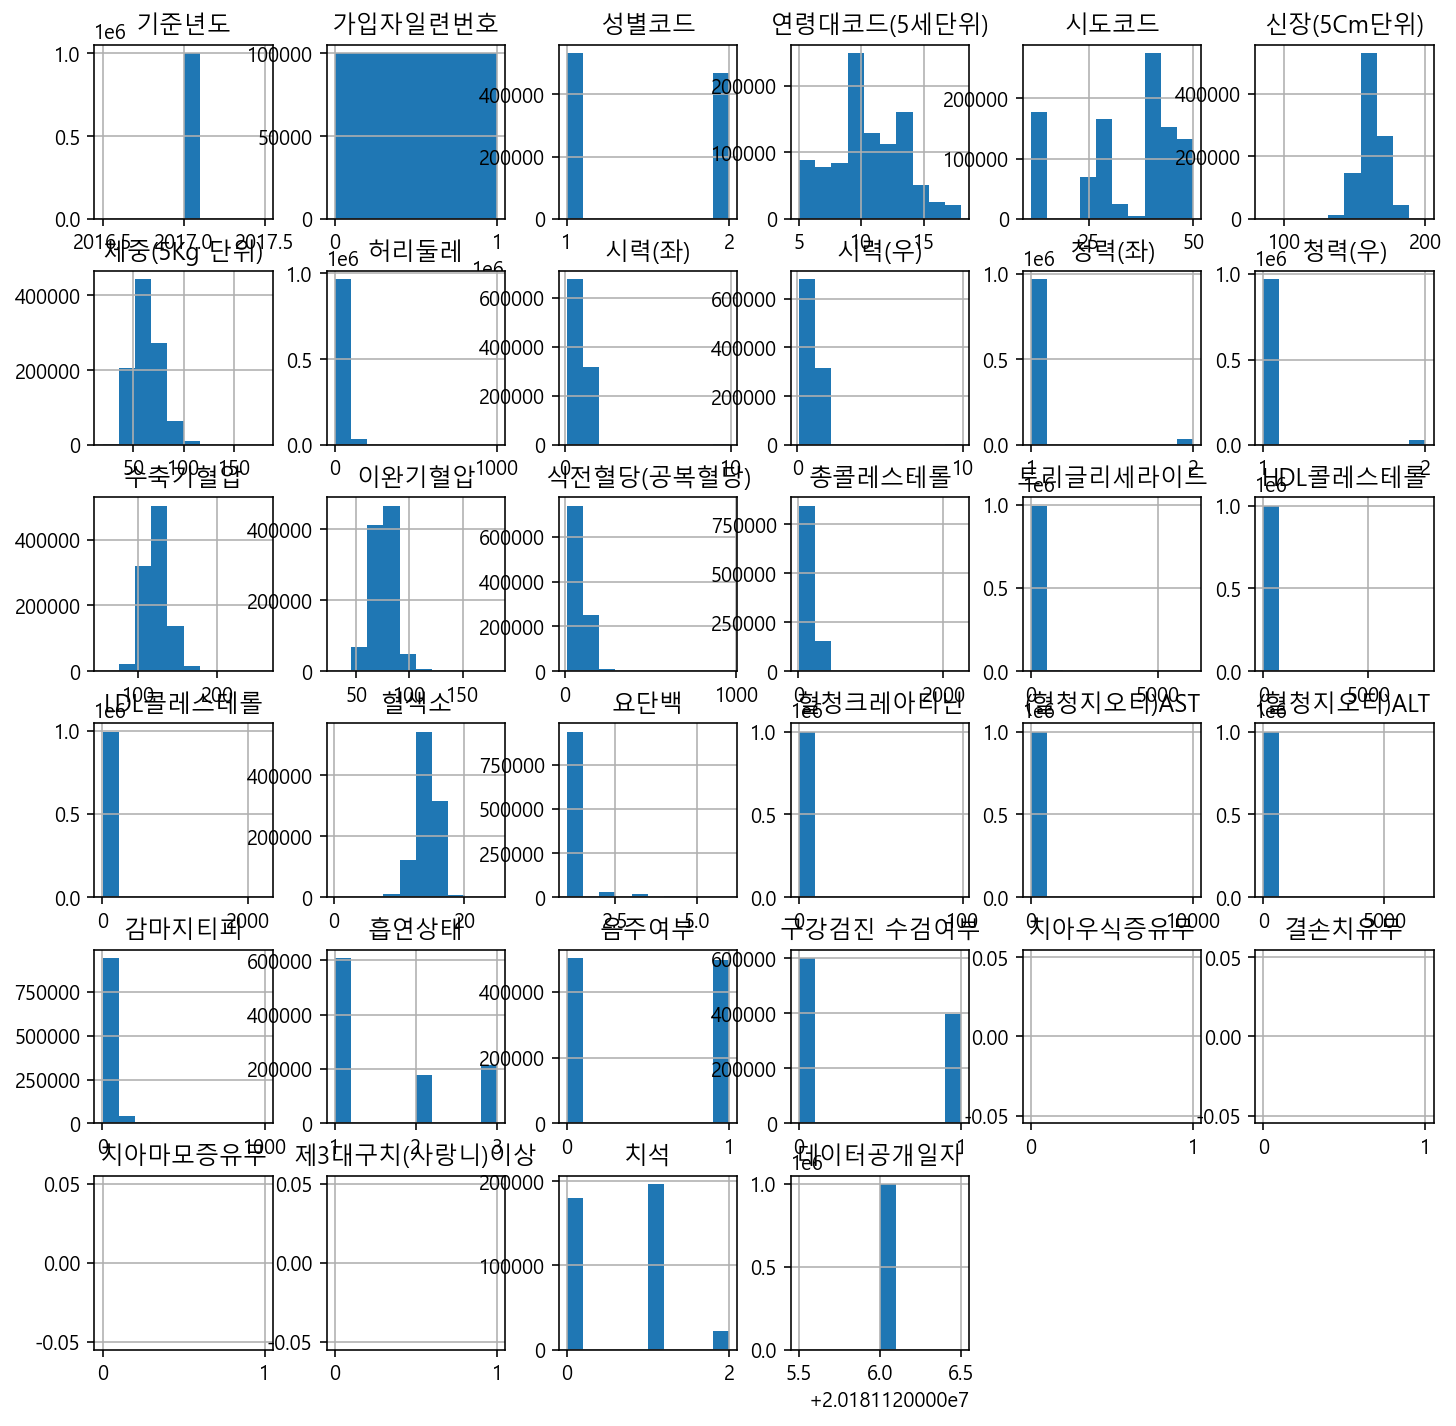

In [37]:
h = df.hist(figsize=(12,12)) 

## 슬라이싱을 사용해 히스토그램 그래기

In [38]:
# [행, 열]
df.iloc[:,:] # 몇번째에 있는 행인지, 컬럼인지 지정 가능
# [:,:] 전체데이터

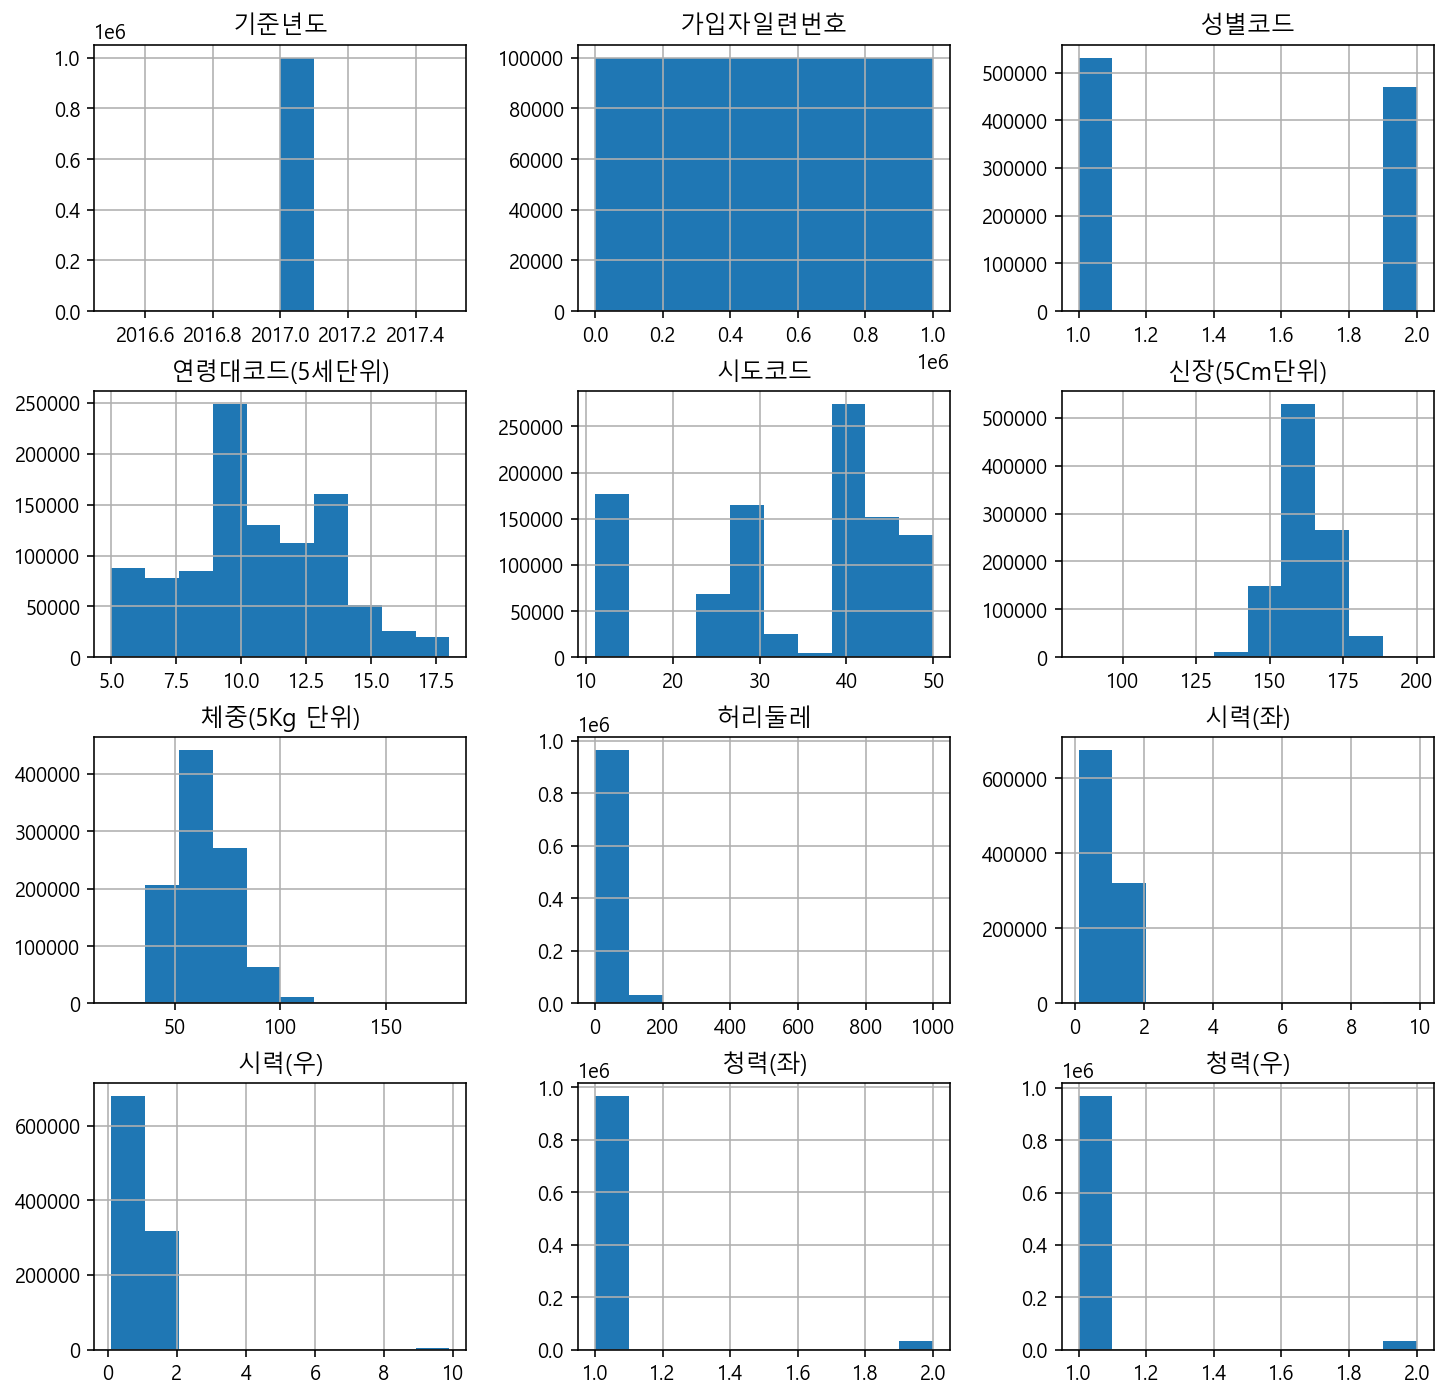

In [39]:
df.iloc[:,:12].hist(figsize=(12,12))

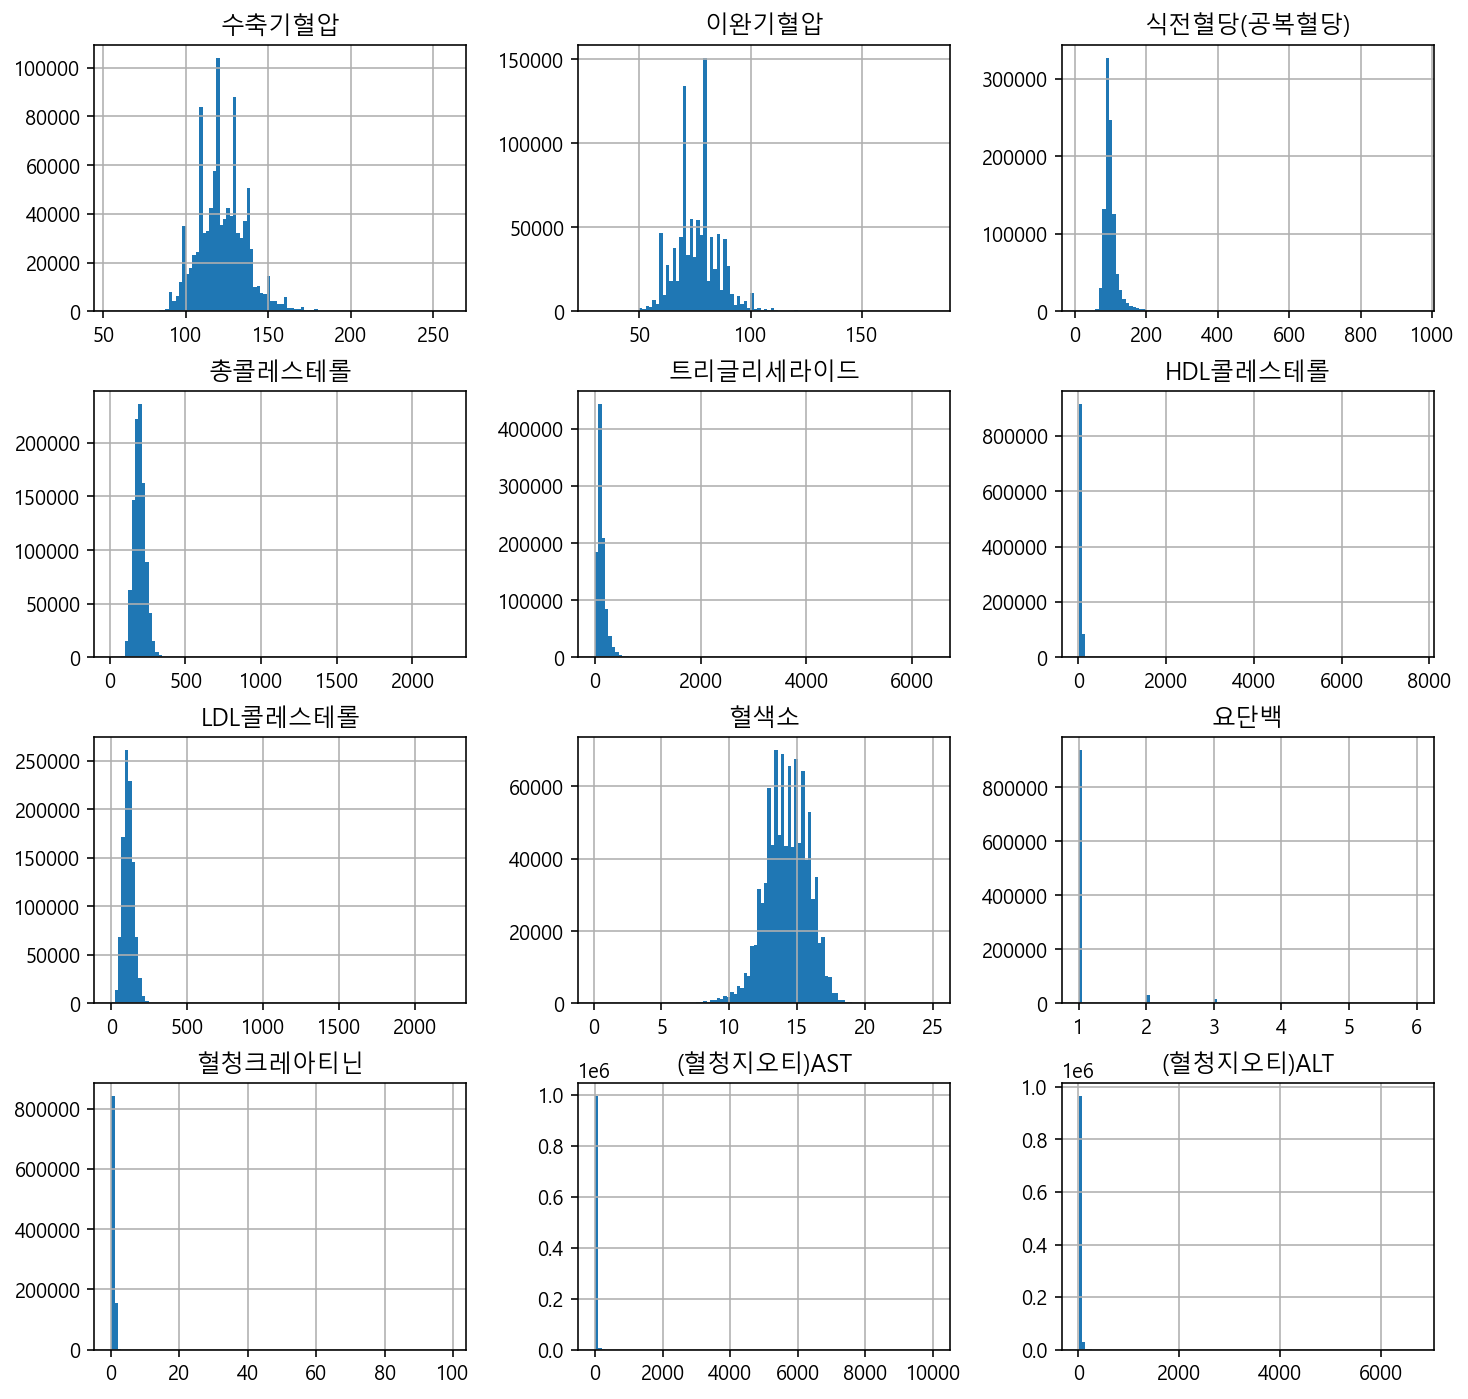

In [40]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번쨰까지 (12:24) 
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)   # bins : 막대 개수를 더 ...  연속된 수치데이터를 카테고리 형태로!!

# 샘플데이터 추출하기

-   seaborn의 그래프는 내부에서 수학적 연산이 되어 데이터가 많으면
    속도가 오래걸린다.

In [41]:
df.sample()

In [42]:
df_sample = df.sample(1000,random_state=1) #random_state : 항상 같은 값을 반환한다. df

In [43]:
df_sample.shape

# 데이터 시각화 도구 seaborn 사용하기

-   https://seaborn.pydata.org/
-   seaborn은 https://matplotilb.org/ 사용하기 쉽게 만들어 졌고,
    간단하게 고급 통계 연산을 할 수 있다.

# 범주형(카테고리) 데이터 시각화

-   countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
-   value_counts 로 구한 값을 시각화

## countplot - 음주여부

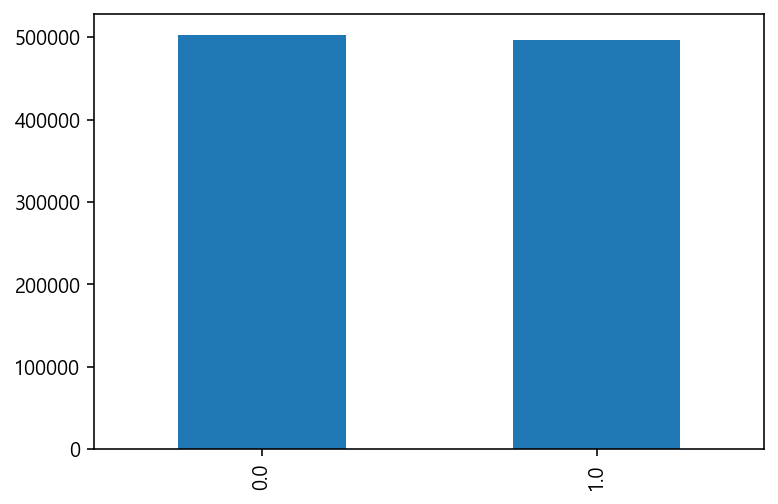

In [44]:
# 음주여부에 따른 countplot을 그린다
df["음주여부"].value_counts().plot.bar()

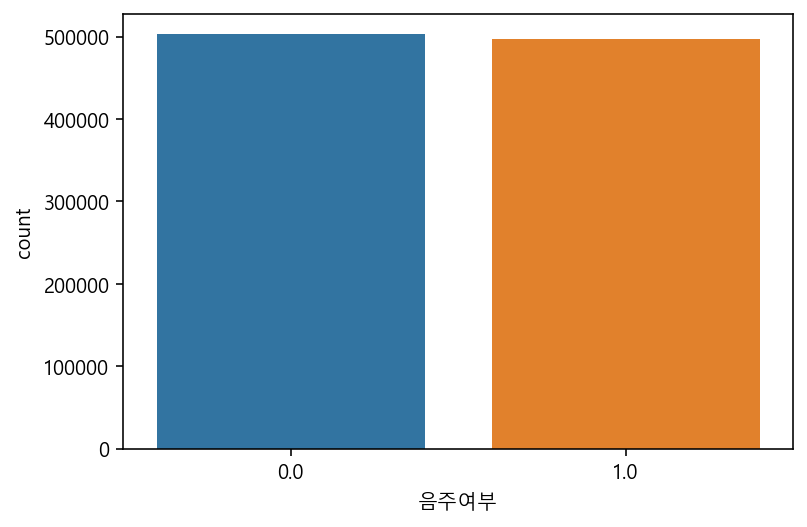

In [45]:
sns.countplot(x="음주여부", data=df)

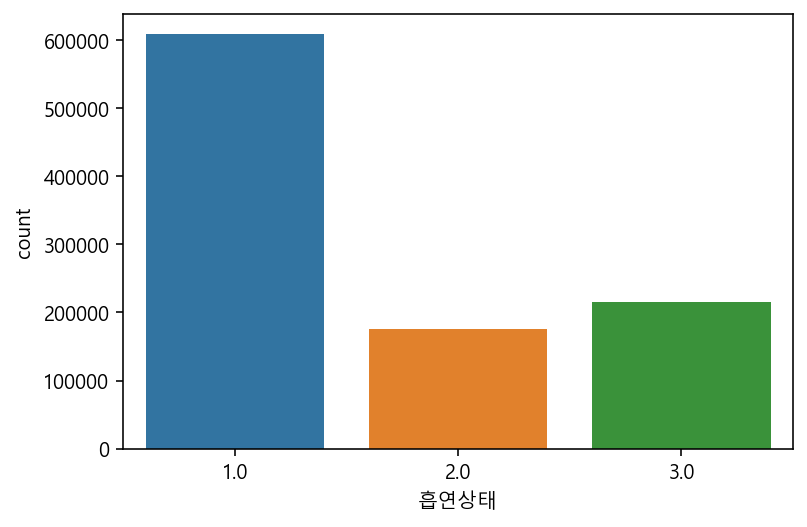

In [46]:
sns.countplot(x="흡연상태", data=df)

## hue 옵션 사용하기

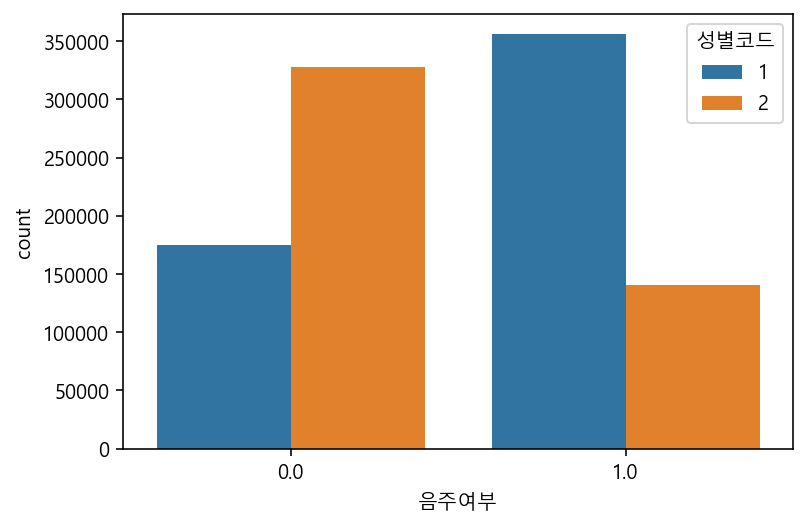

In [47]:
#window
# sns.set(font_scale=1.5, font="Malgun Gothic") 이렇게도 사용 가능

sns.countplot(data=df, x="음주여부", hue="성별코드")

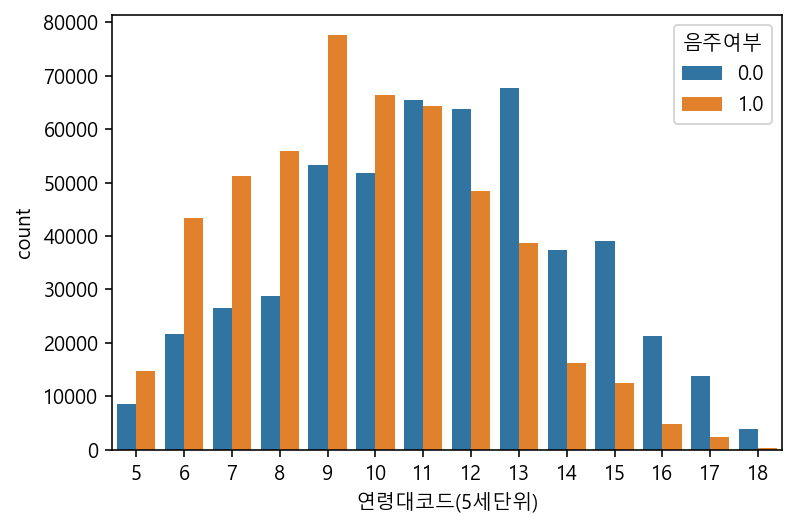

In [48]:

sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부") 

## countplot - 키와 몸무게

-   키와 몸무게는 연속형 데이터이다.
-   하지만 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있다.
-   이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형
    데이터라고 본다.

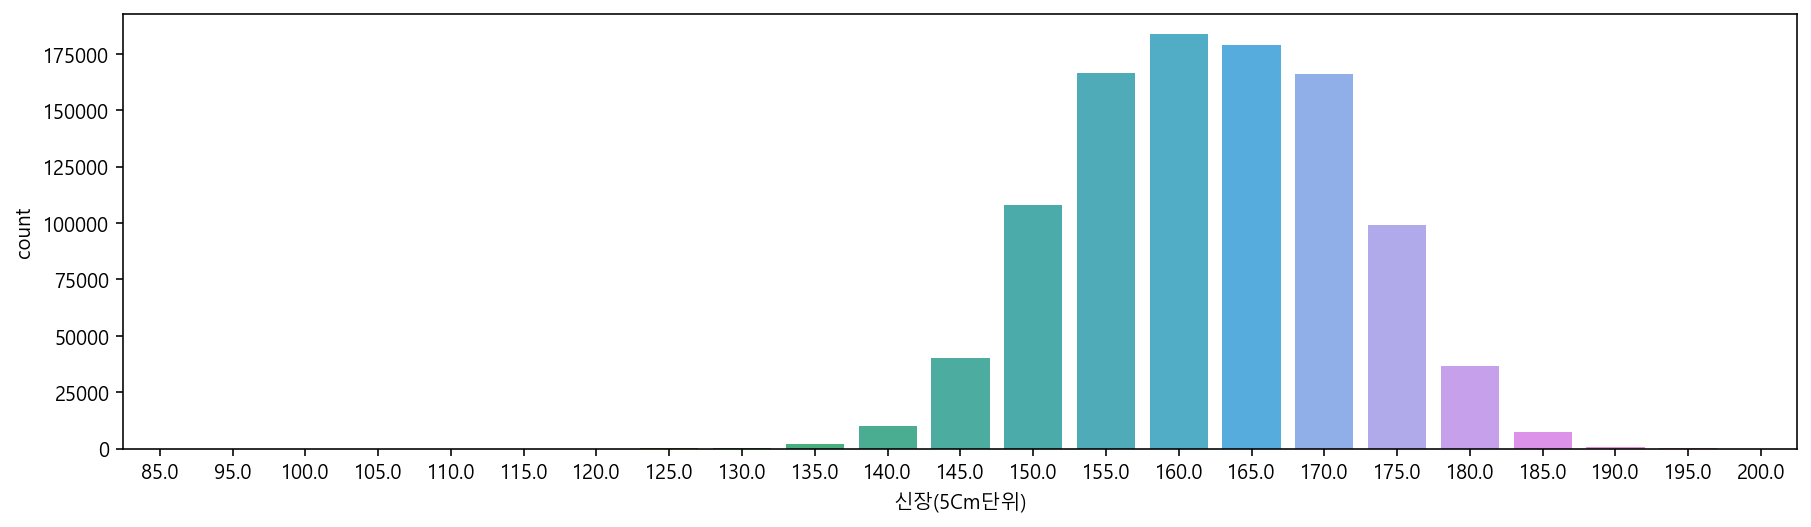

In [49]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

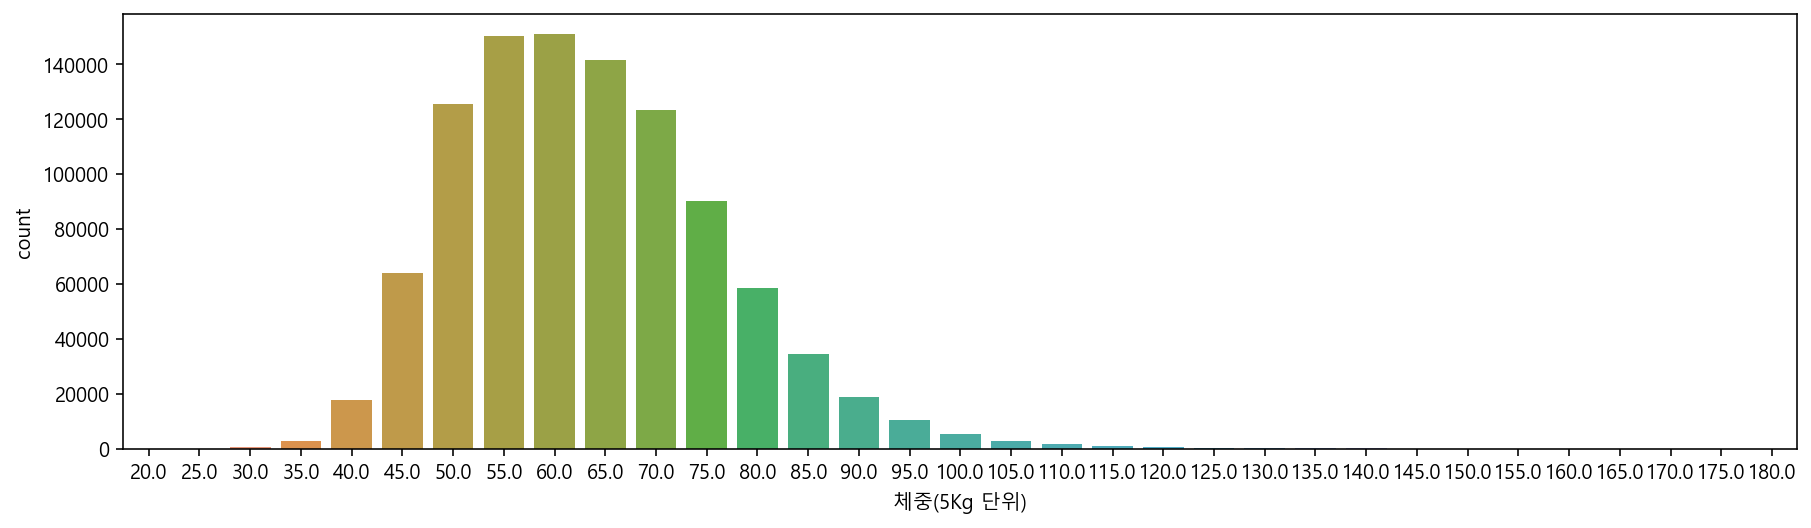

In [50]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)")

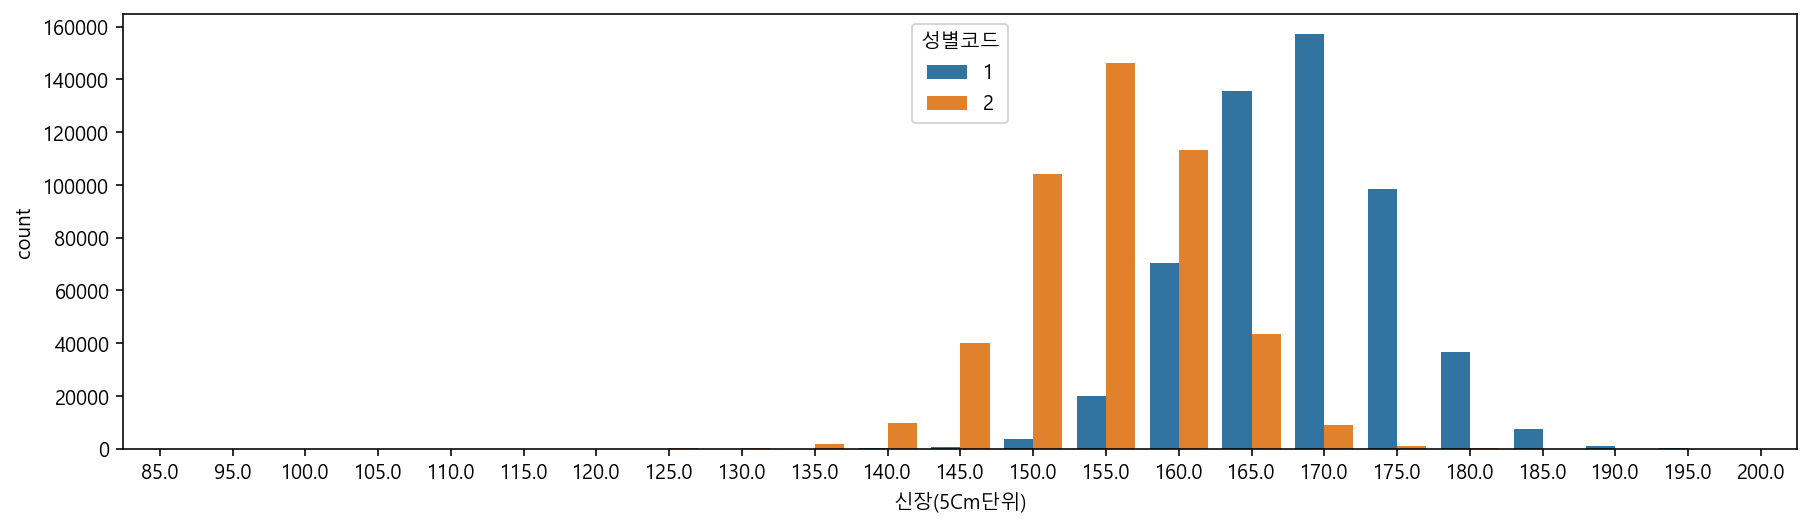

In [51]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

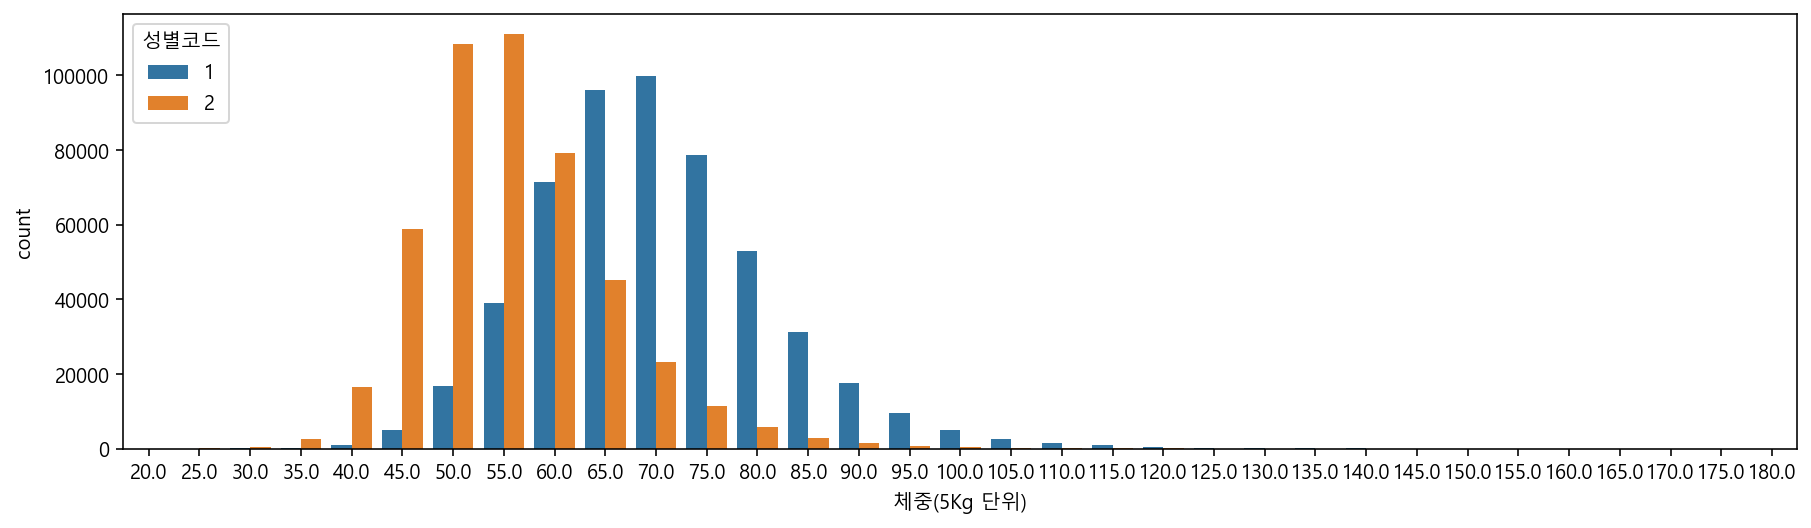

In [52]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

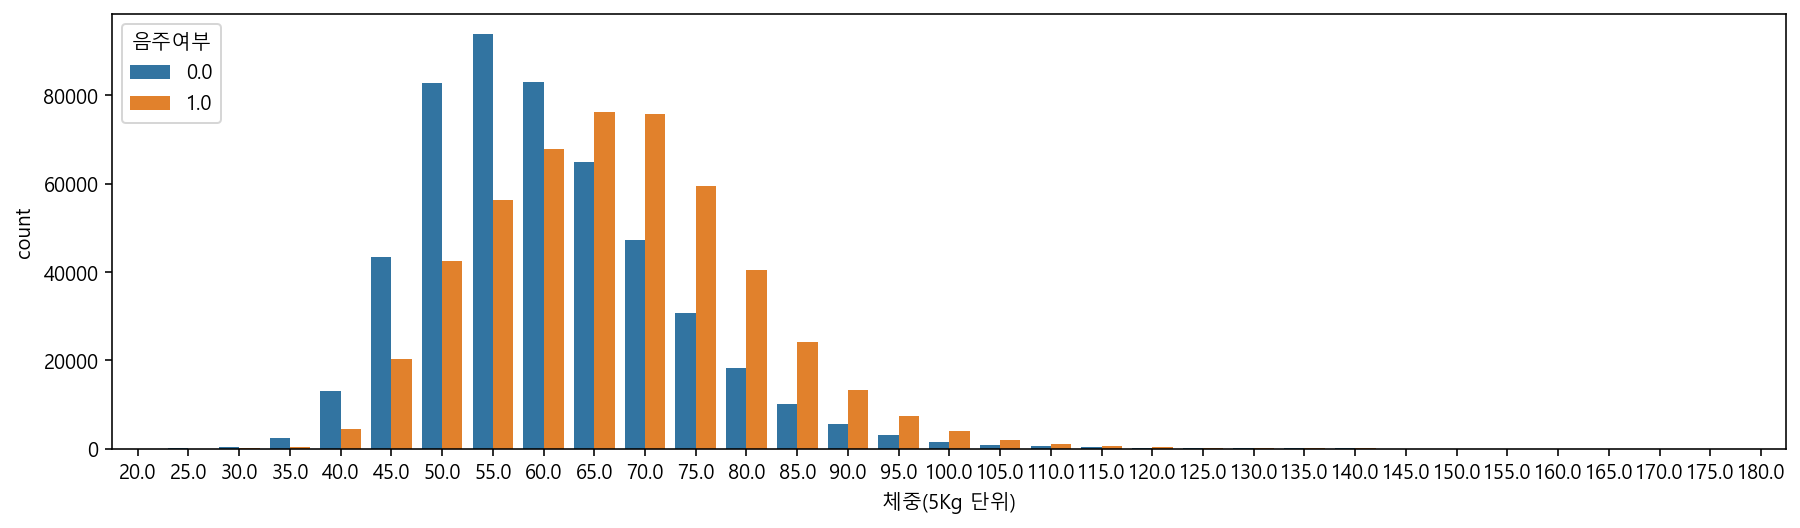

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

## 14. 4 braplot - 수치형 vs 범주형

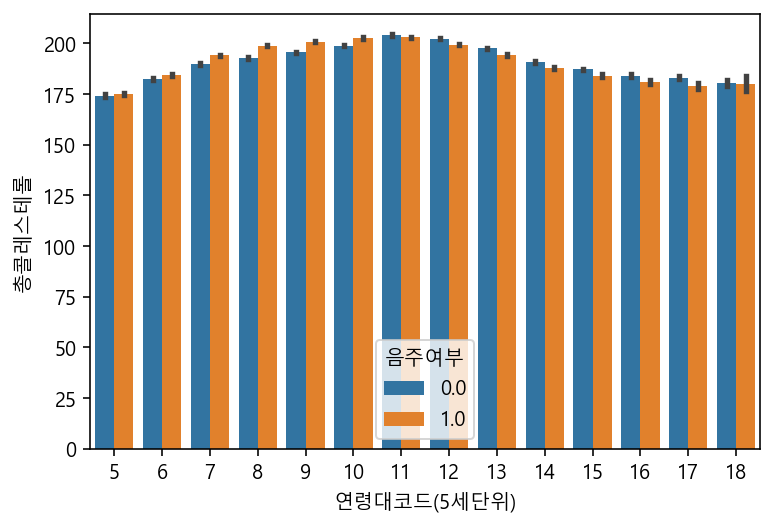

In [54]:
# 연령대코드와 총 콜레스테롤 보기
# hue로 색상 다르게 표현. 음주여부 같이 보기

sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

# 느리다! countplot와 비교했을때 ! 백만개의 데이터가 있는데.. 연령대 코드별로 총 콜레스테롤을 그리긴 했지만. .

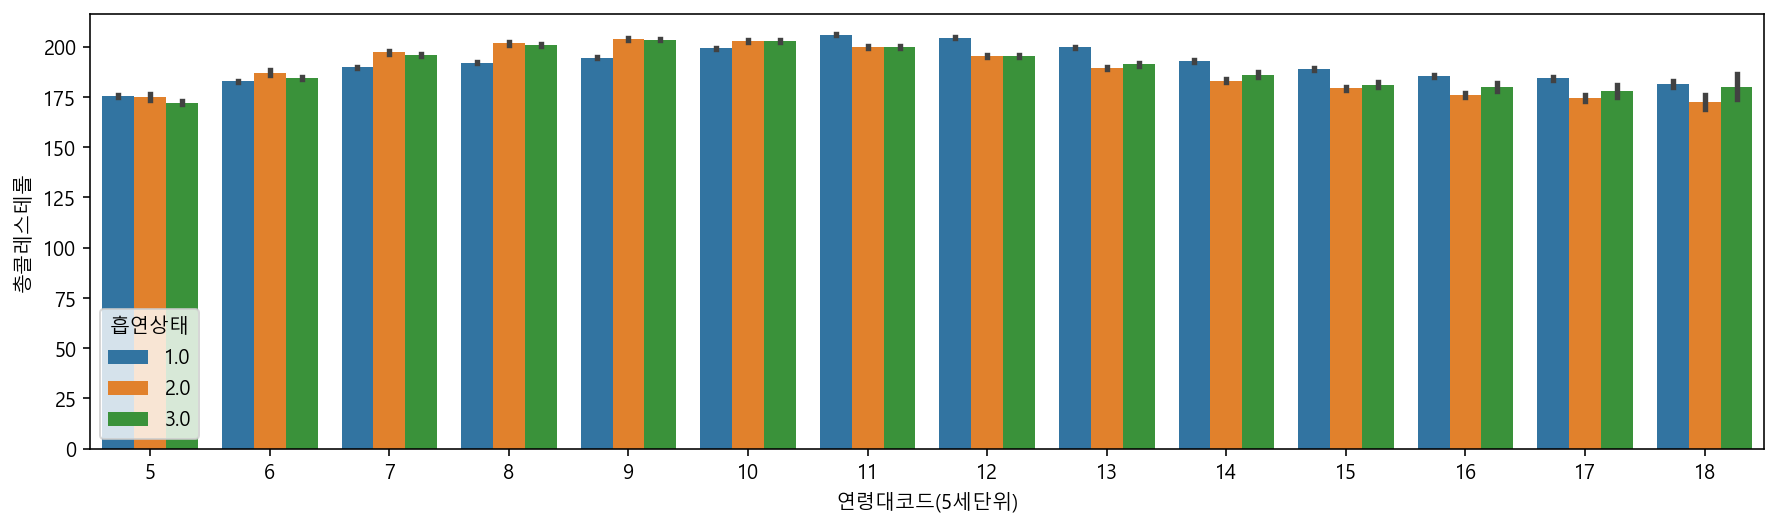

In [55]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

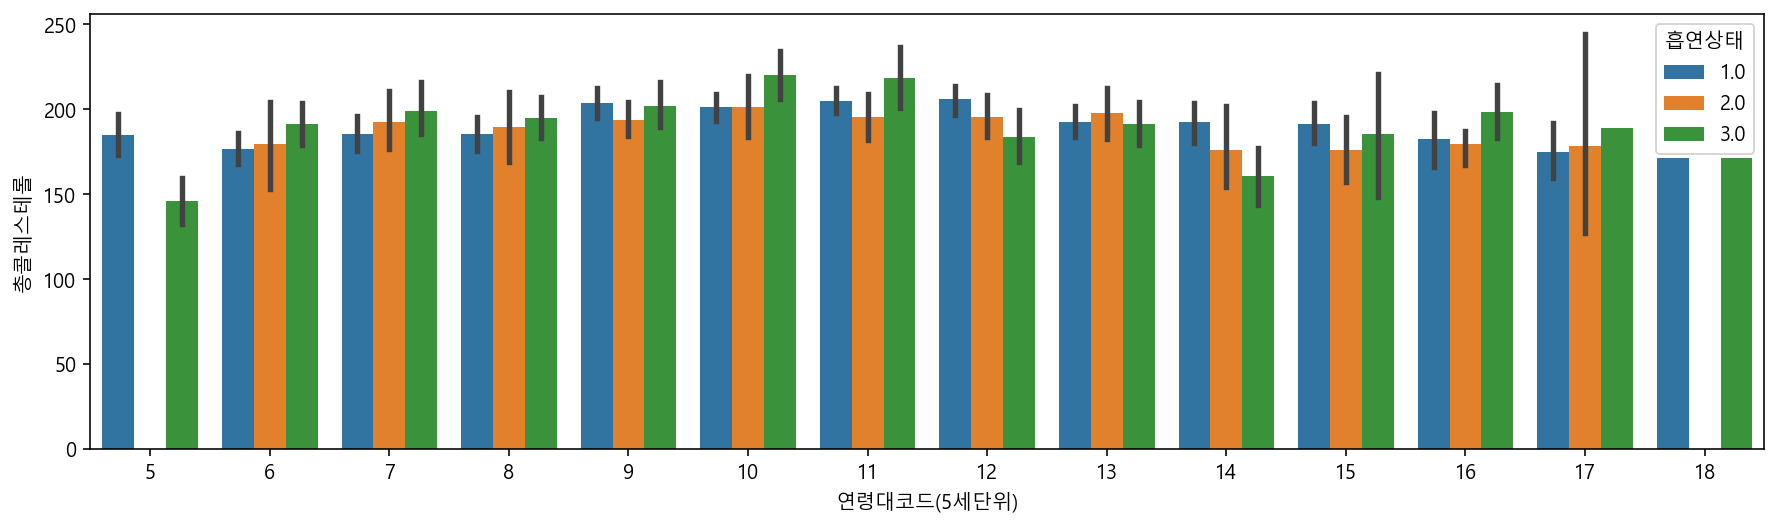

In [56]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

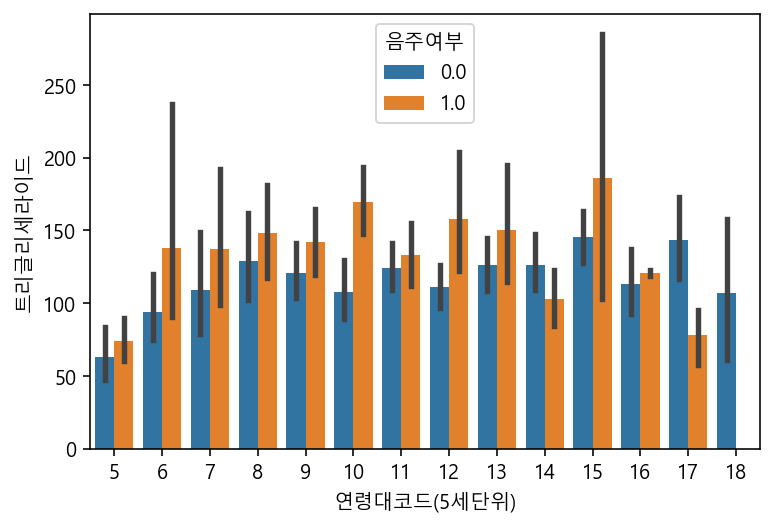

In [57]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot로 그리기
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=95)

# 검은색 막대: 신뢰구간을 의미 (ci: 95)-> 95%의 신뢰구간을 표시한다.

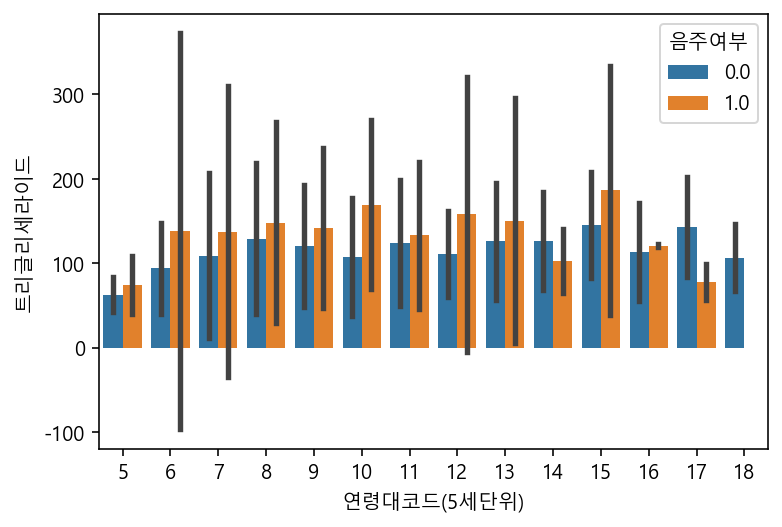

In [58]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd") #sd:표준편차
# sample로 그려서 편차가 커보인다. 

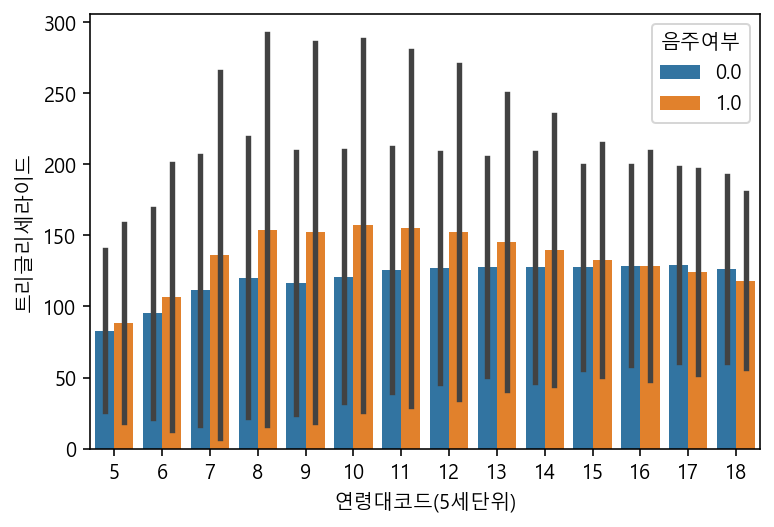

In [59]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd") #sd:표준편차

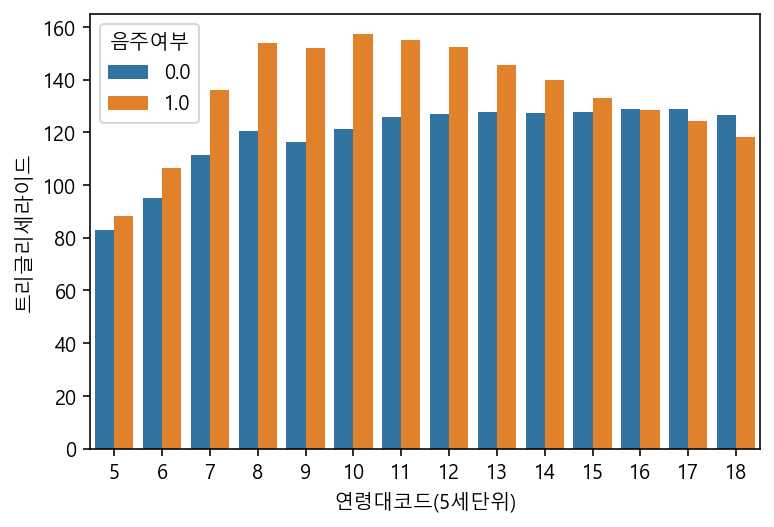

In [60]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None) #sd:표준편차

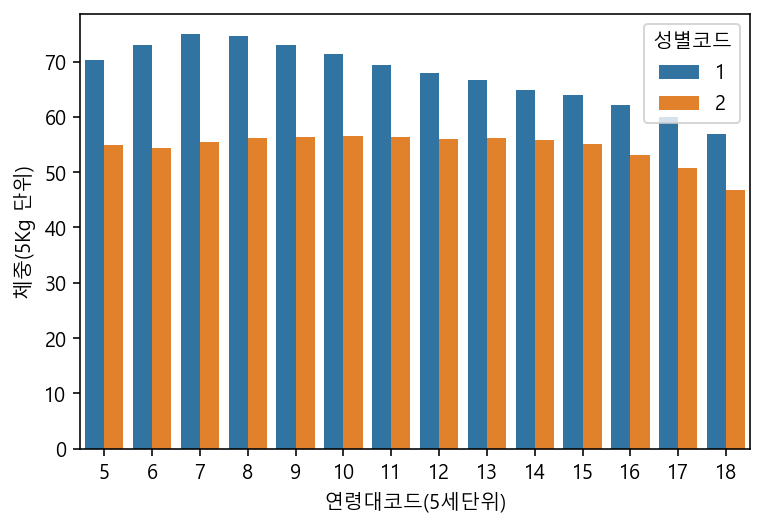

In [61]:
# 연령대코드와 체중(5kg 단위)을 성별에 따라서.
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None) 

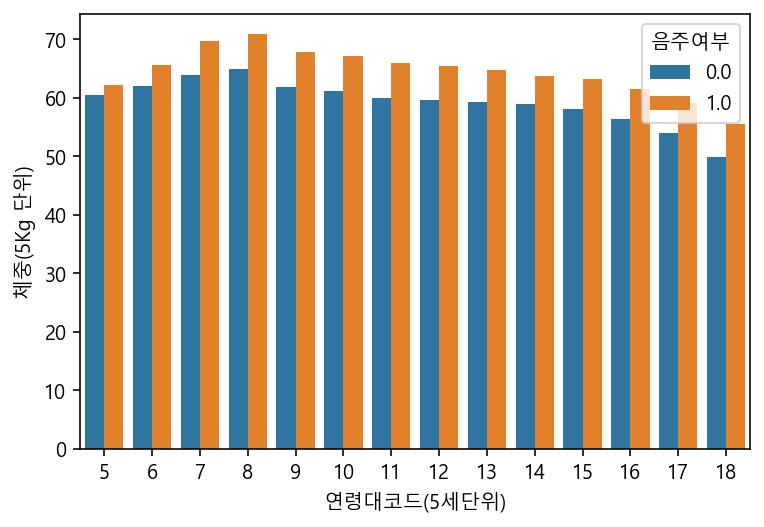

In [62]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

## lineplot and pointplot

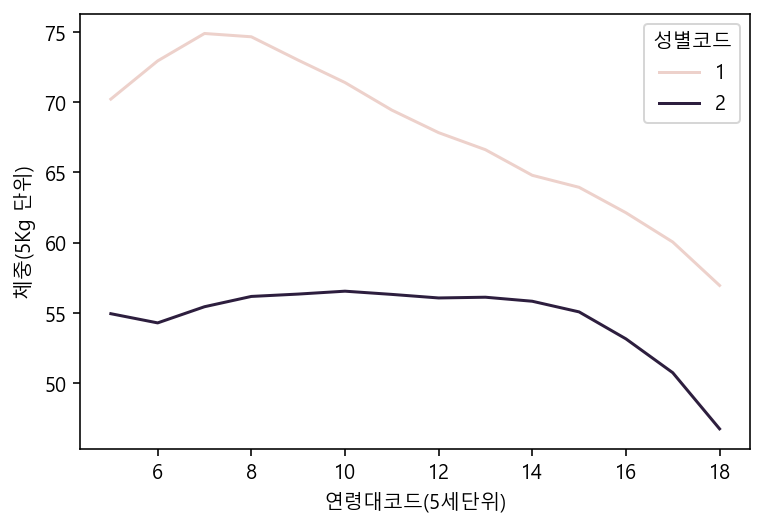

In [63]:
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci=None)

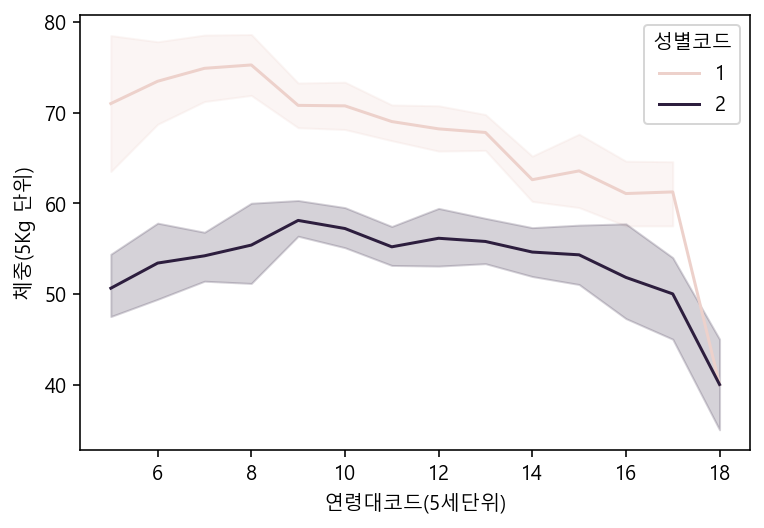

In [64]:
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드")
# 그림자로 표시!! 

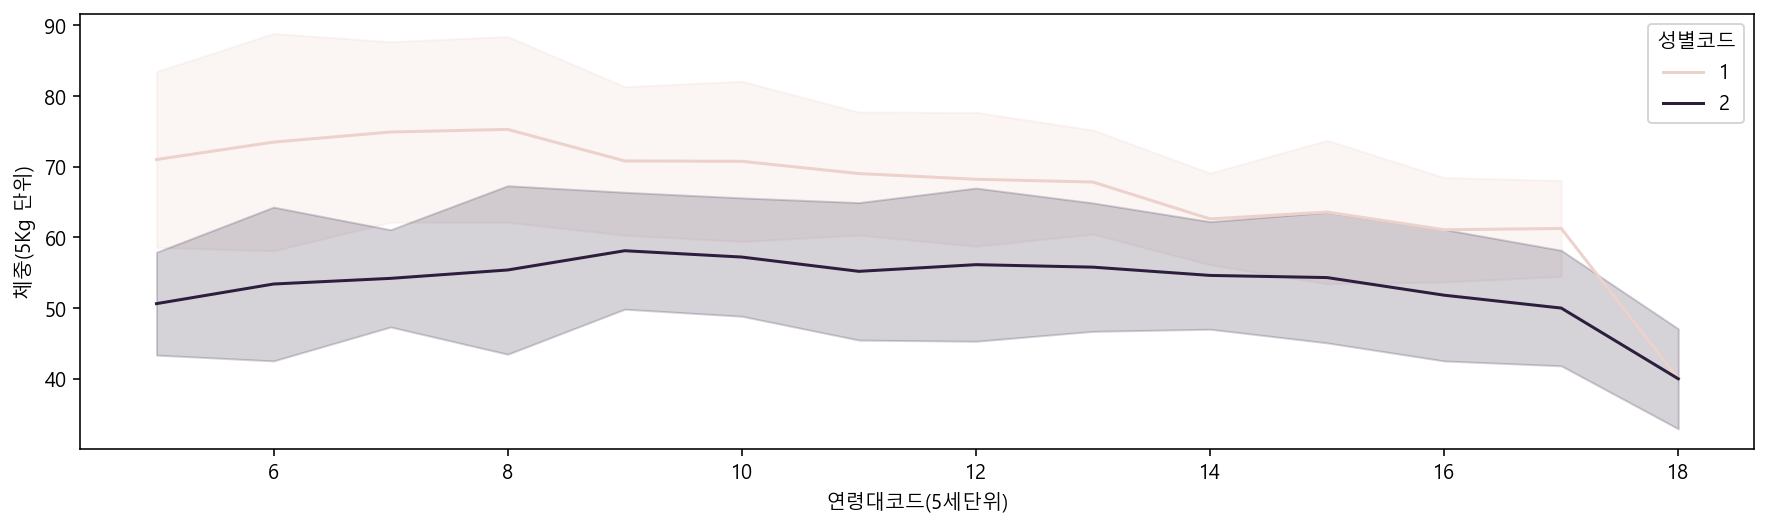

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="성별코드", ci="sd")
# 그림자로 표시!! 

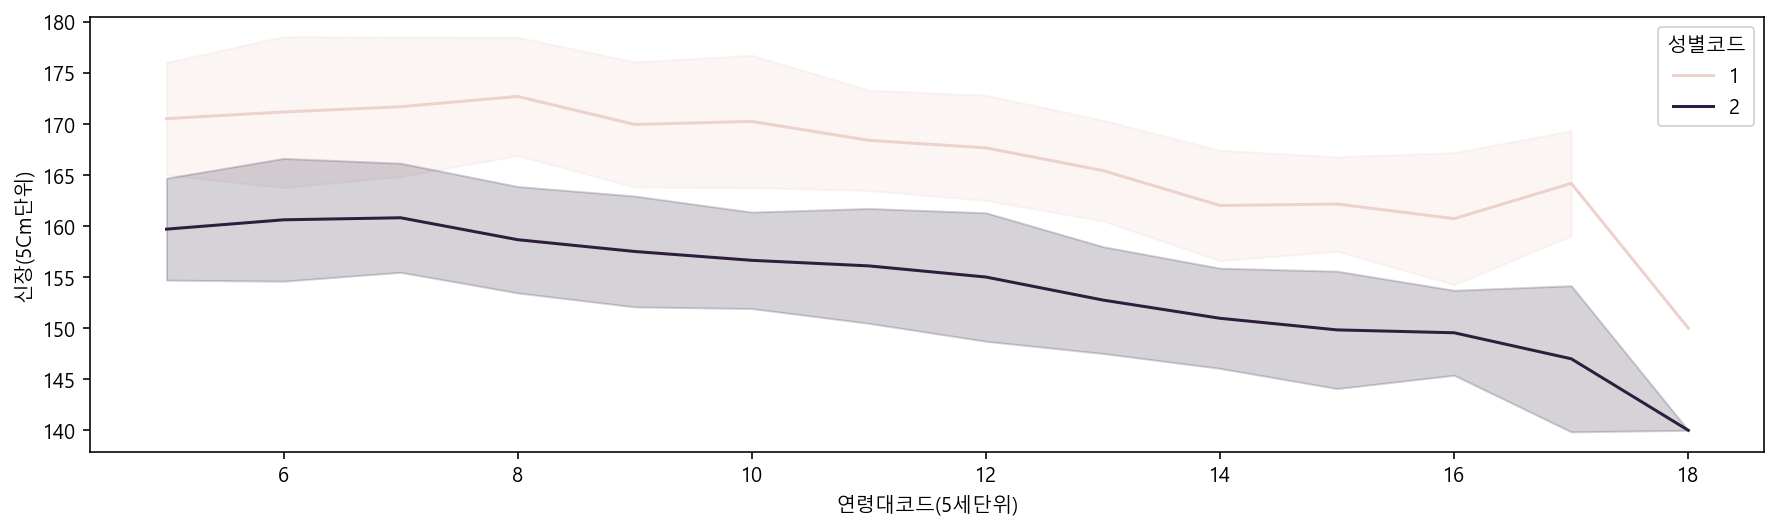

In [66]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")


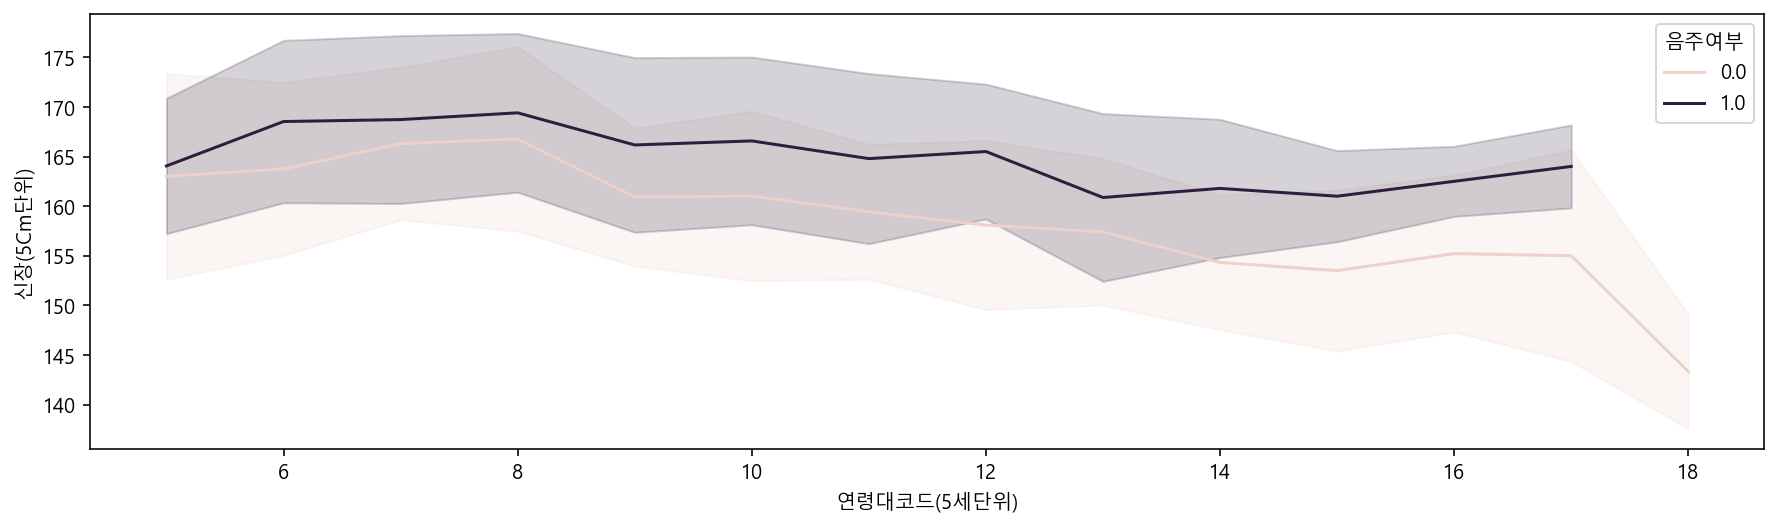

In [67]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


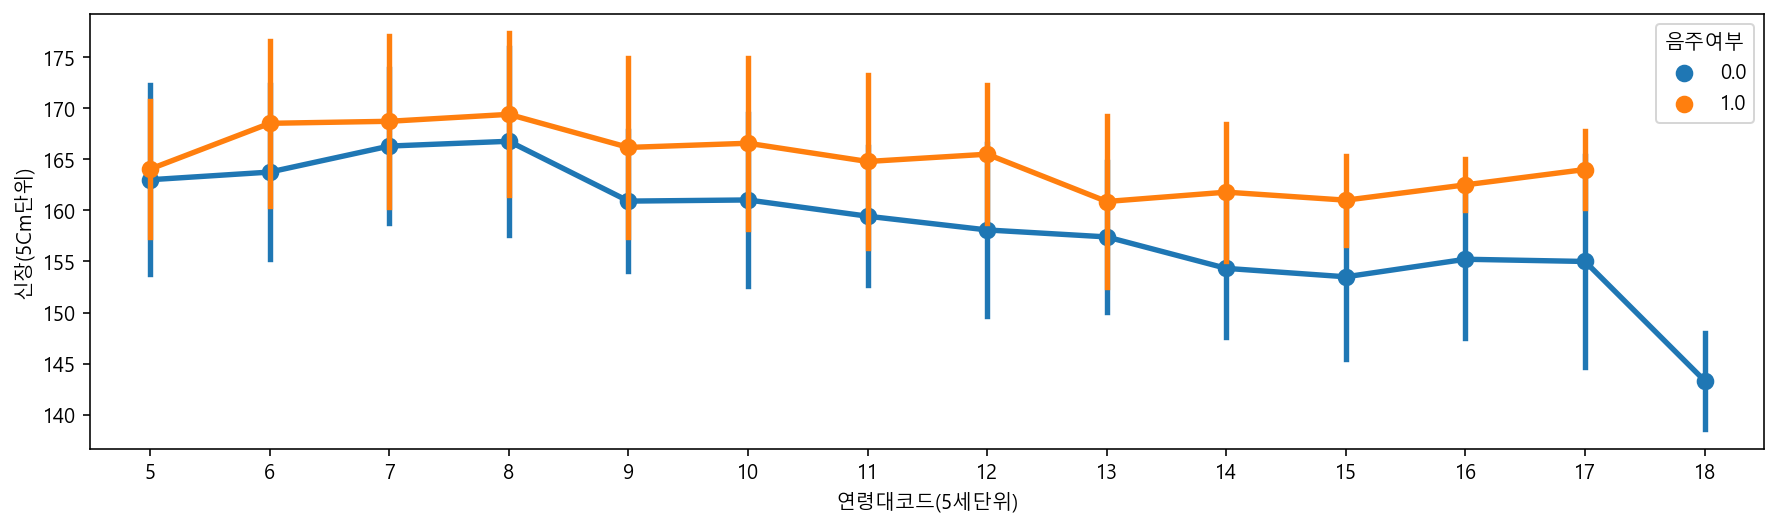

In [68]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")


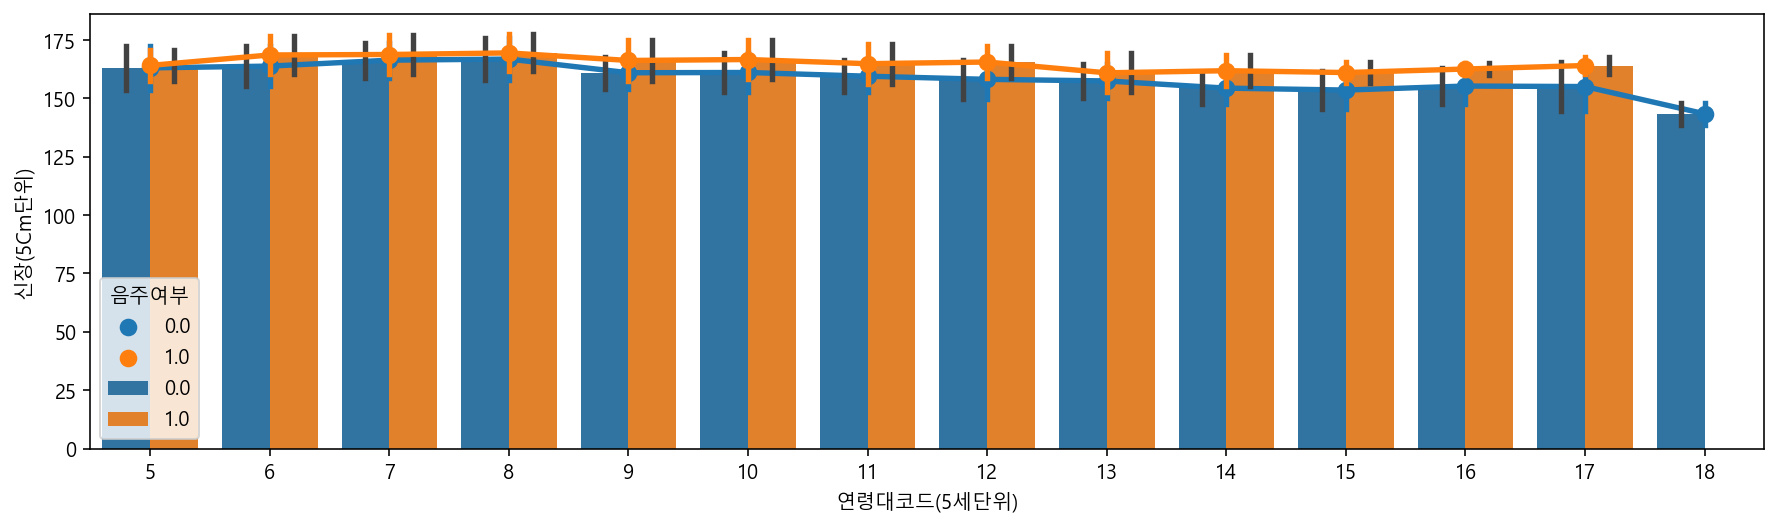

In [69]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
# 두개를 겹쳐서 그릴 수도 있다.

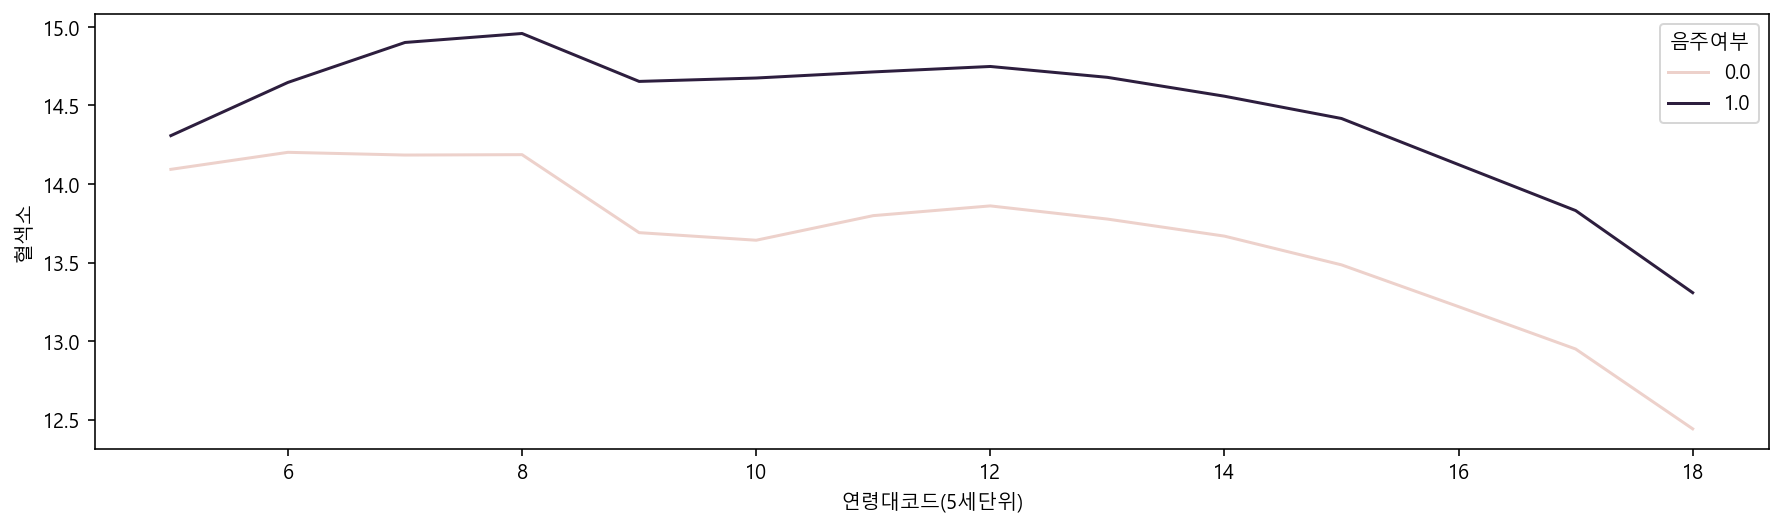

In [70]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## boxplot

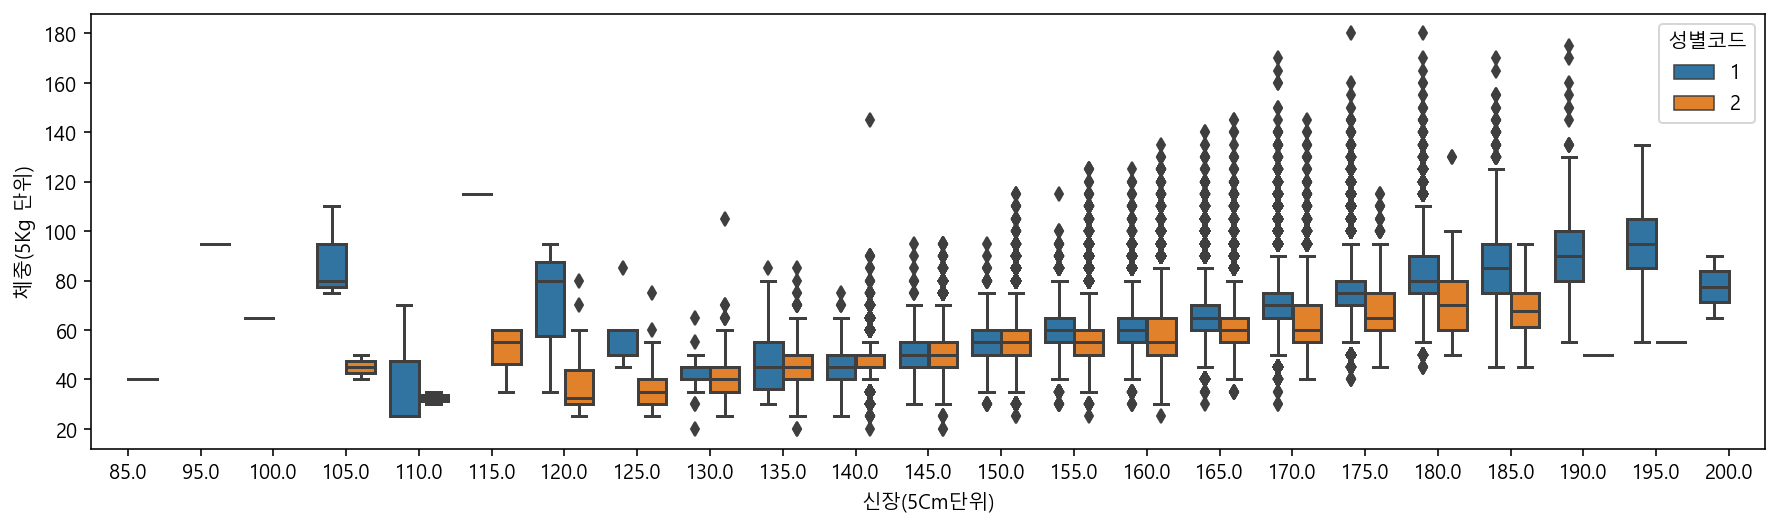

In [73]:
# boxplot으로 신장에 따른 체중을 그리며, 성별코드에 따른 색상으로 표현하기
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

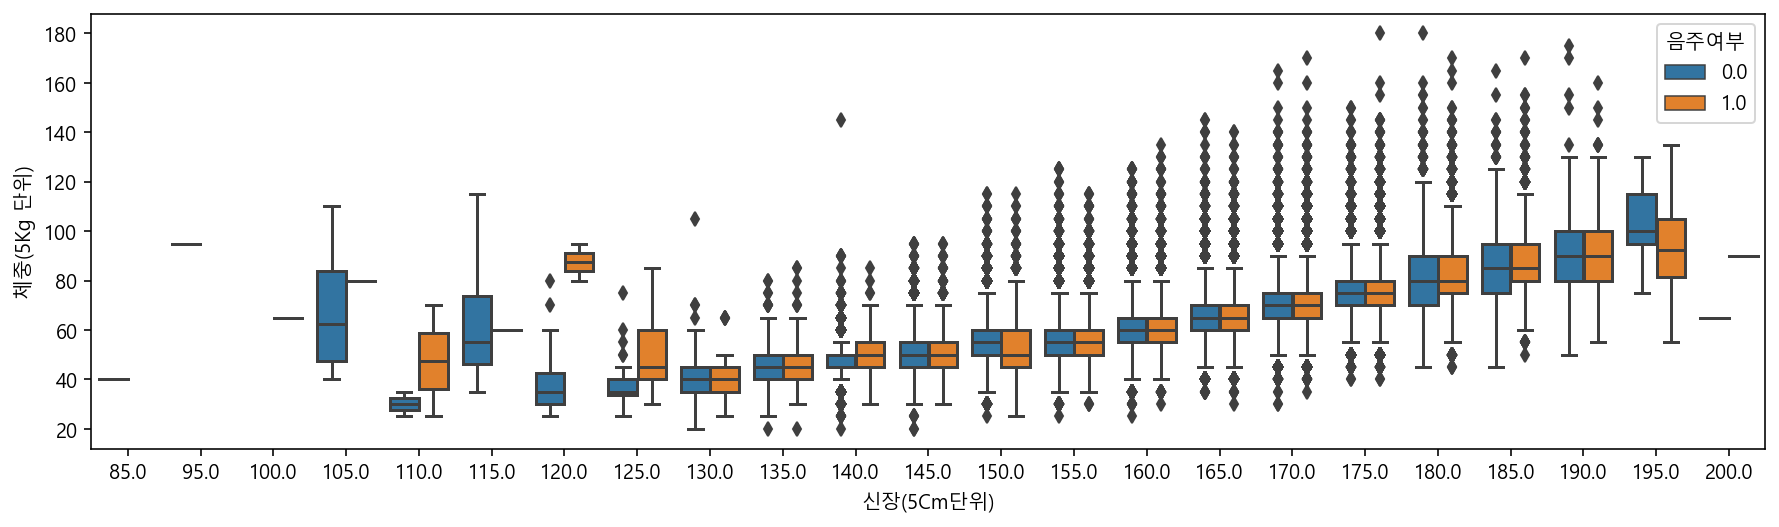

In [74]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

## violinplot

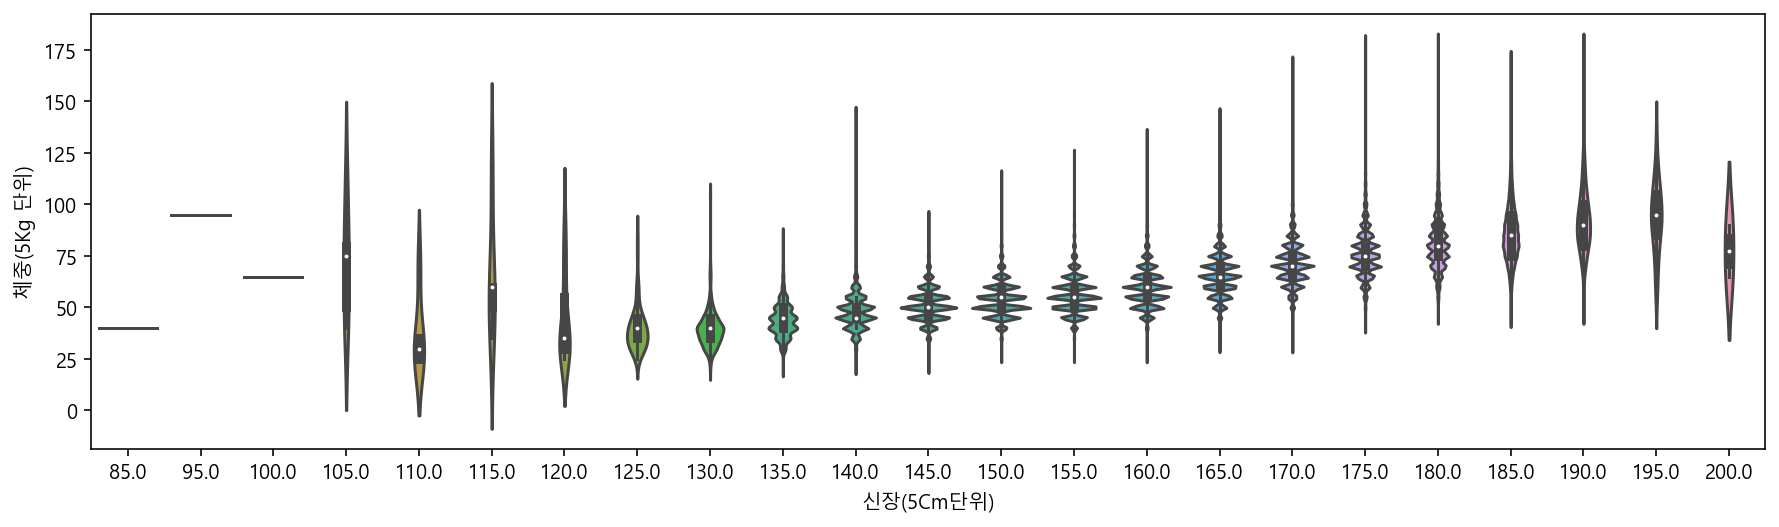

In [76]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

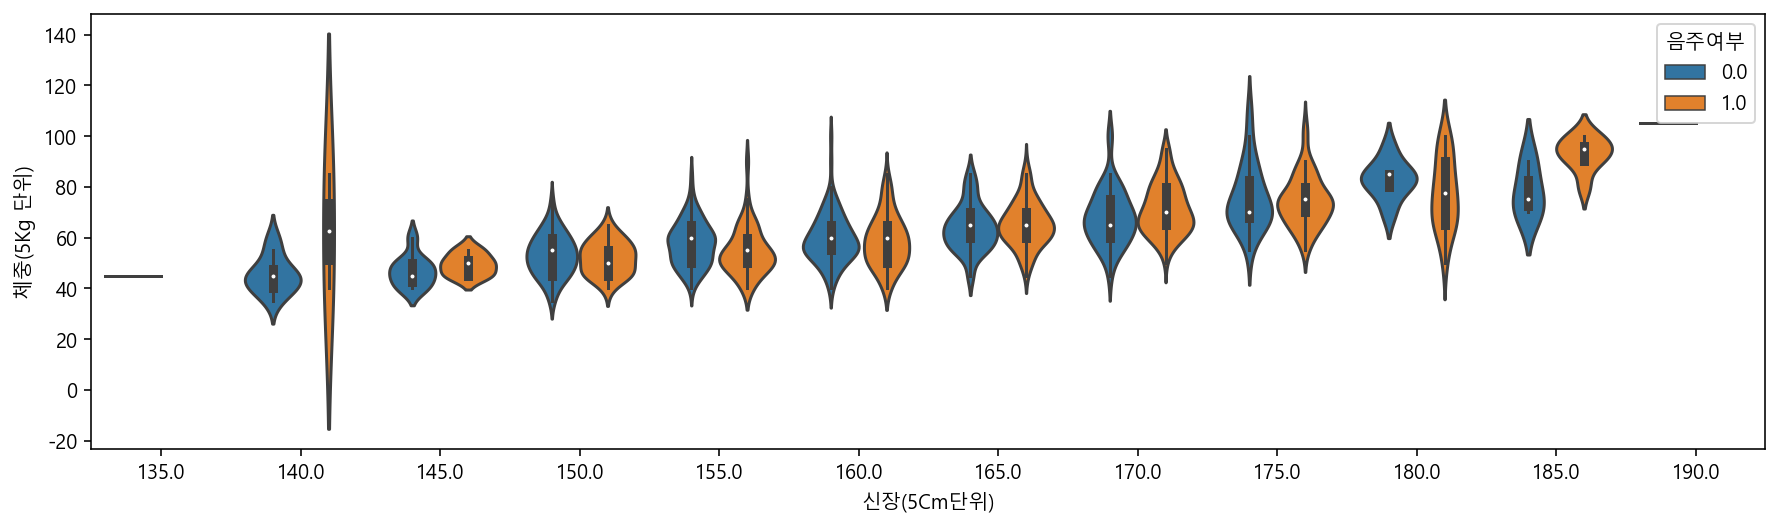

In [78]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

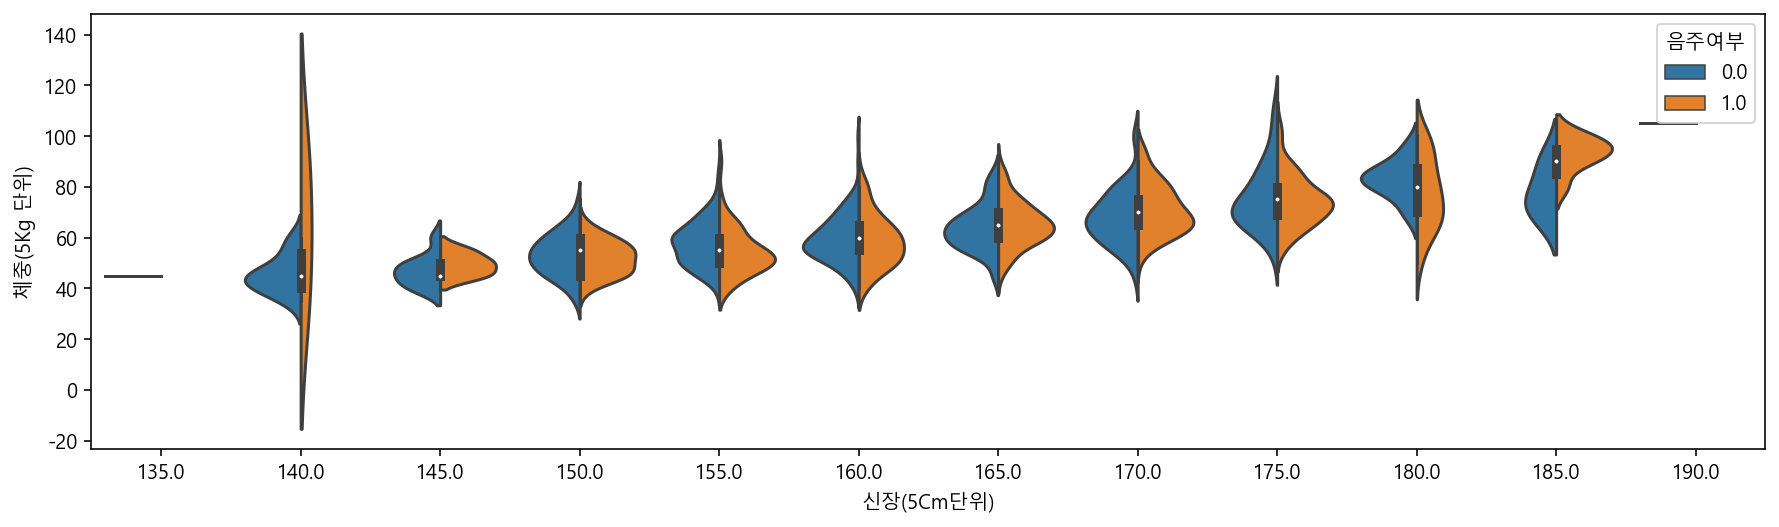

In [79]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)
# split : 두개의 값을 합쳐서 그림

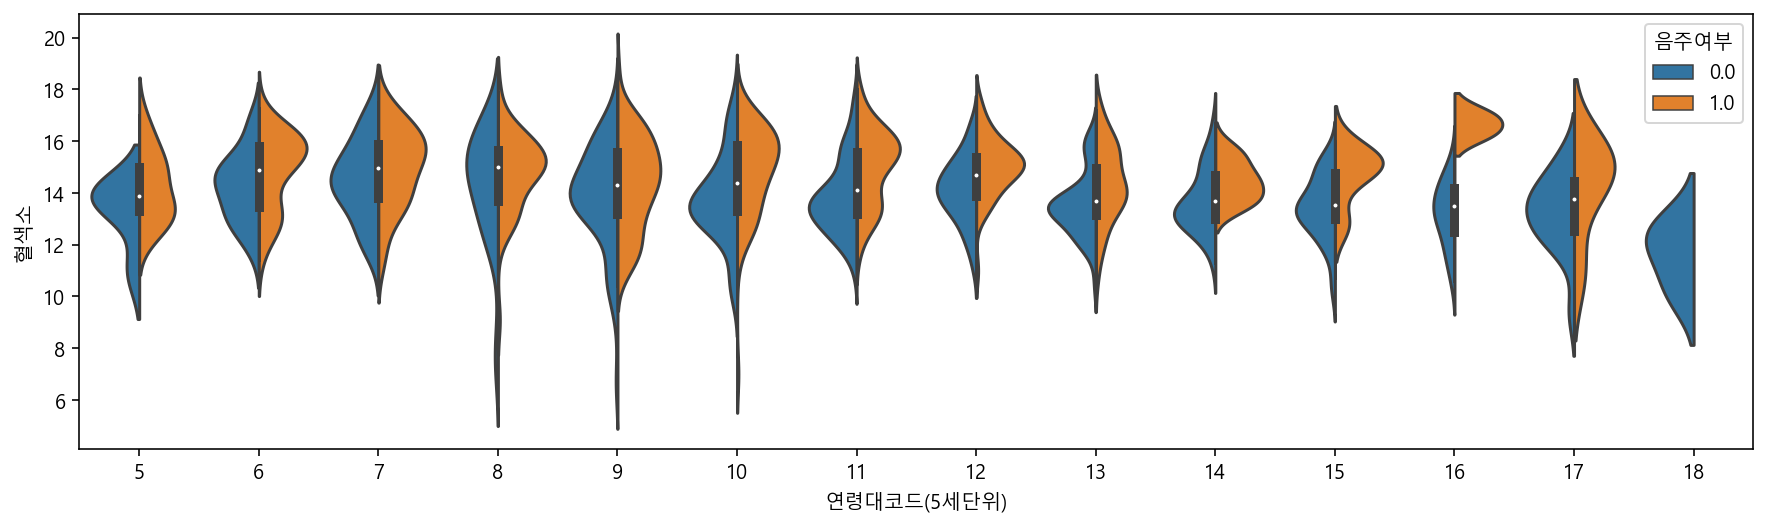

In [80]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## swarm plot

-   범주형 데이터를 산점도로 시각화하고자 할 대 사용한다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.0% of the points cann

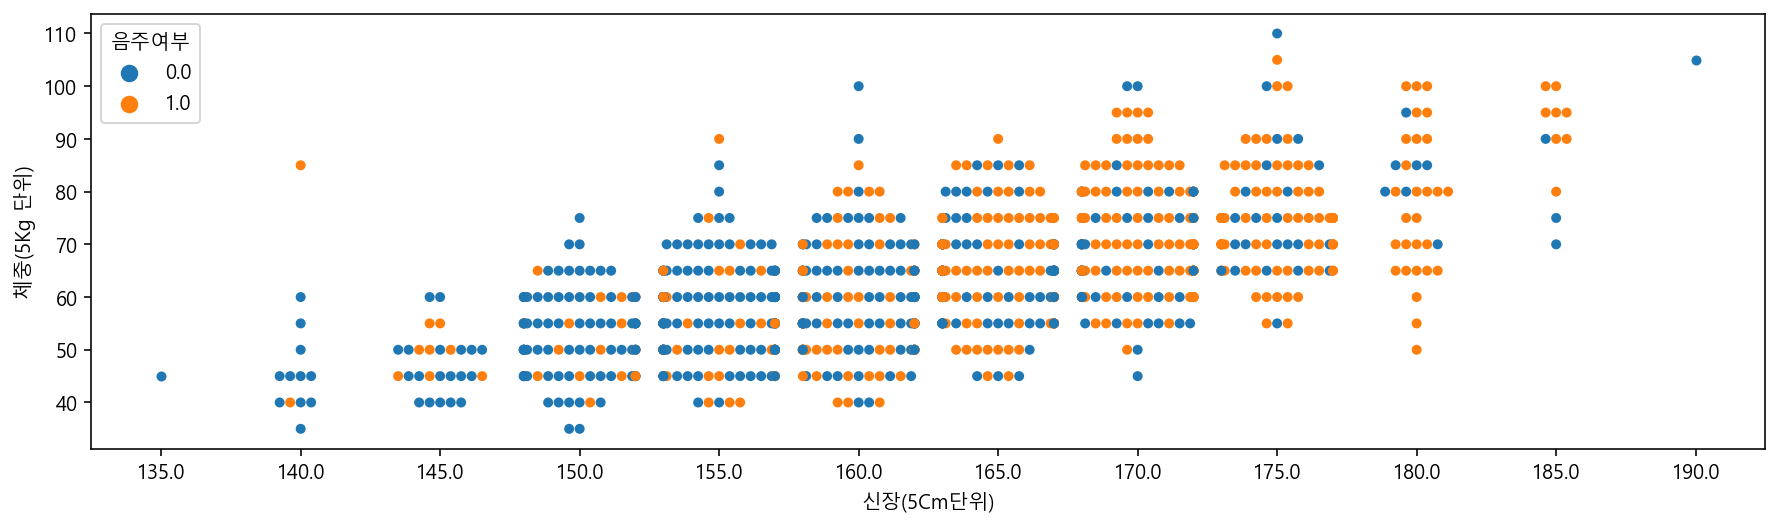

In [88]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

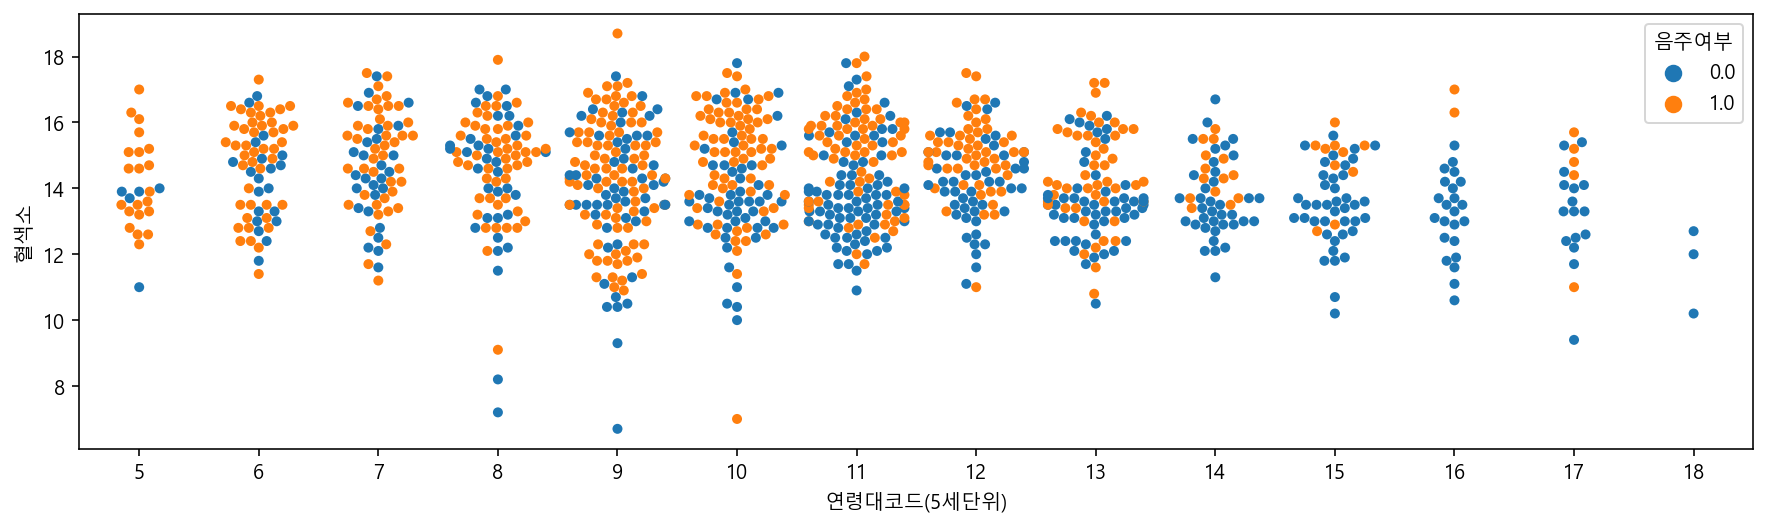

In [89]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

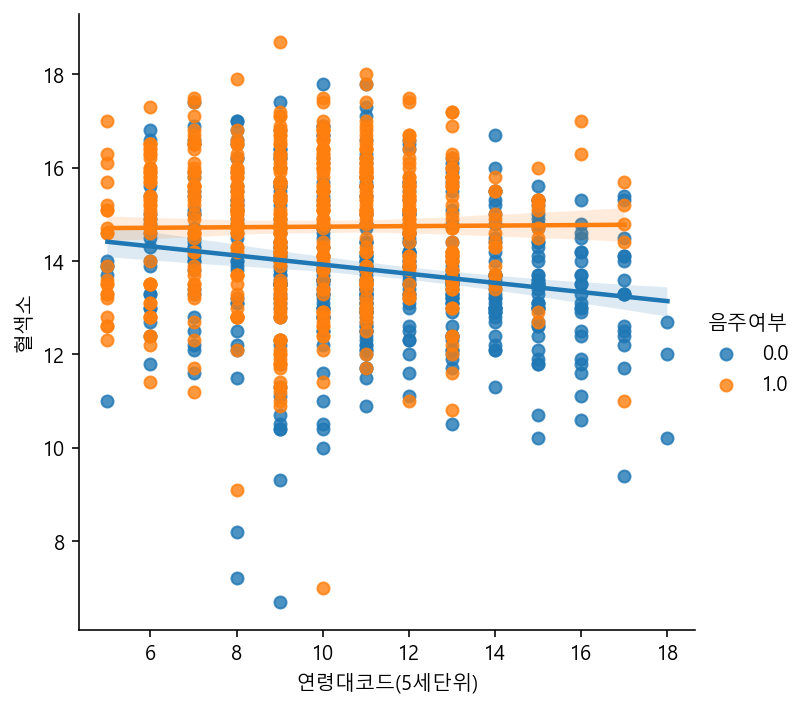

In [93]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")
# 회귀선을 그려서 상관관계를 보여준다.

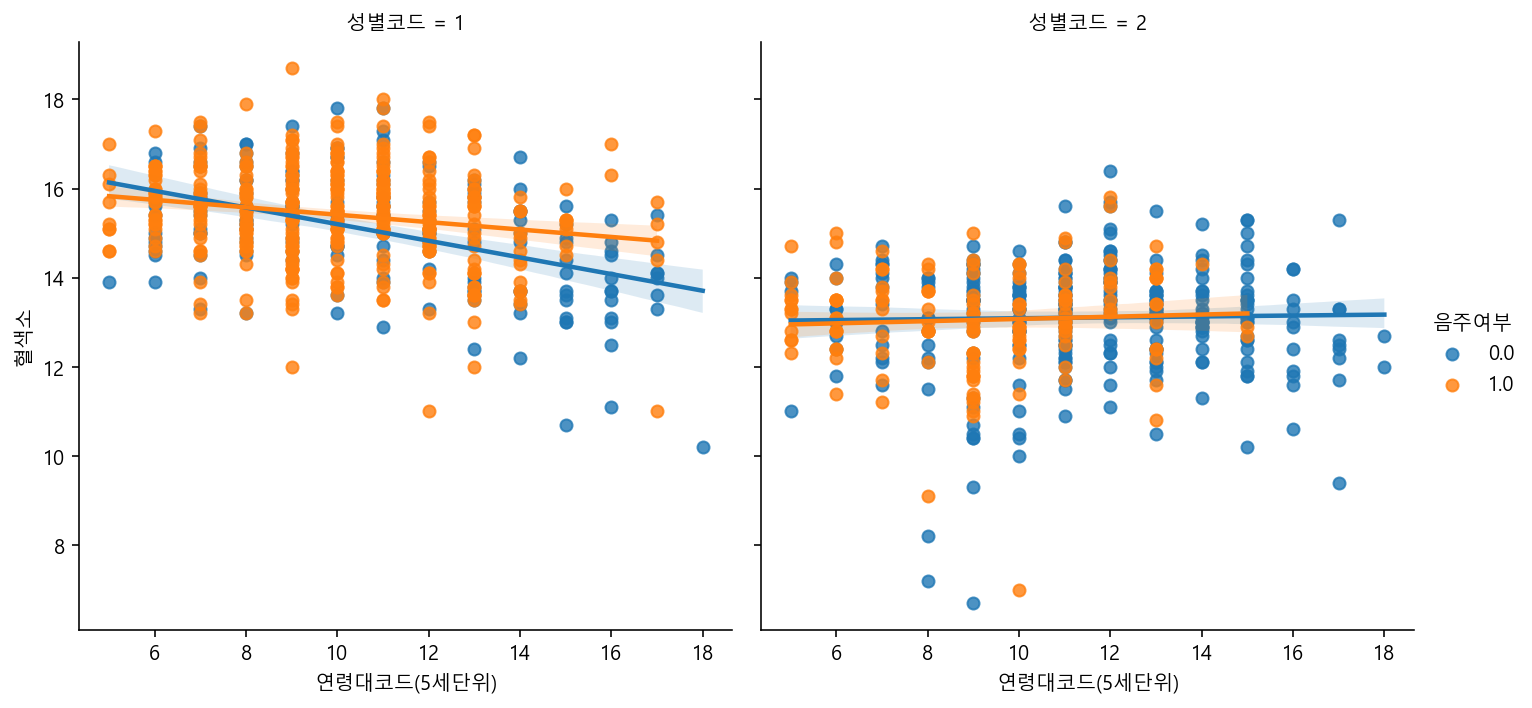

In [94]:
# lmplot 으로 그리기
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")
# 회귀선을 그려서 상관관계를 보여준다.
# col통해서 여러게 나오게 한다. 